### 패키지 참조

In [142]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
from math import sqrt
import seaborn as sb
from pandas import read_excel, melt, pivot_table, merge, concat, DataFrame
from matplotlib import pyplot as plt
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator
import numpy as np

### 그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["axes.unicode_minus"] = False

# 연습문제 (T-Test)

## 문제 1

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 `500g`이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 `500g`이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.

| 무게  | 무게  | 무게  | 무게  | 무게  |
|-----|-----|-----|-----|-----|
| 482 | 477 | 477 | 478 | 481 |
| 479 | 482 | 479 | 480 | 484 |
| 485 | 480 | 476 | 480 | 480 |
| 474 | 480 | 481 | 477 | 482 |
| 479 | 483 | 476 | 479 | 483 |

25일간 측정한 빵의 평균 무게는 `480g`이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

> https://data.hossam.kr/mldata/bread.xlsx

### [1] 데이터 가져오기

In [3]:
df1 = read_excel('https://data.hossam.kr/mldata/bread.xlsx')
df1 # 단일표본 T Test

,무게
0,482
1,479
2,485
3,474
4,479
5,477
6,482
7,480
8,480
9,483


### [2] 신뢰구간 확인


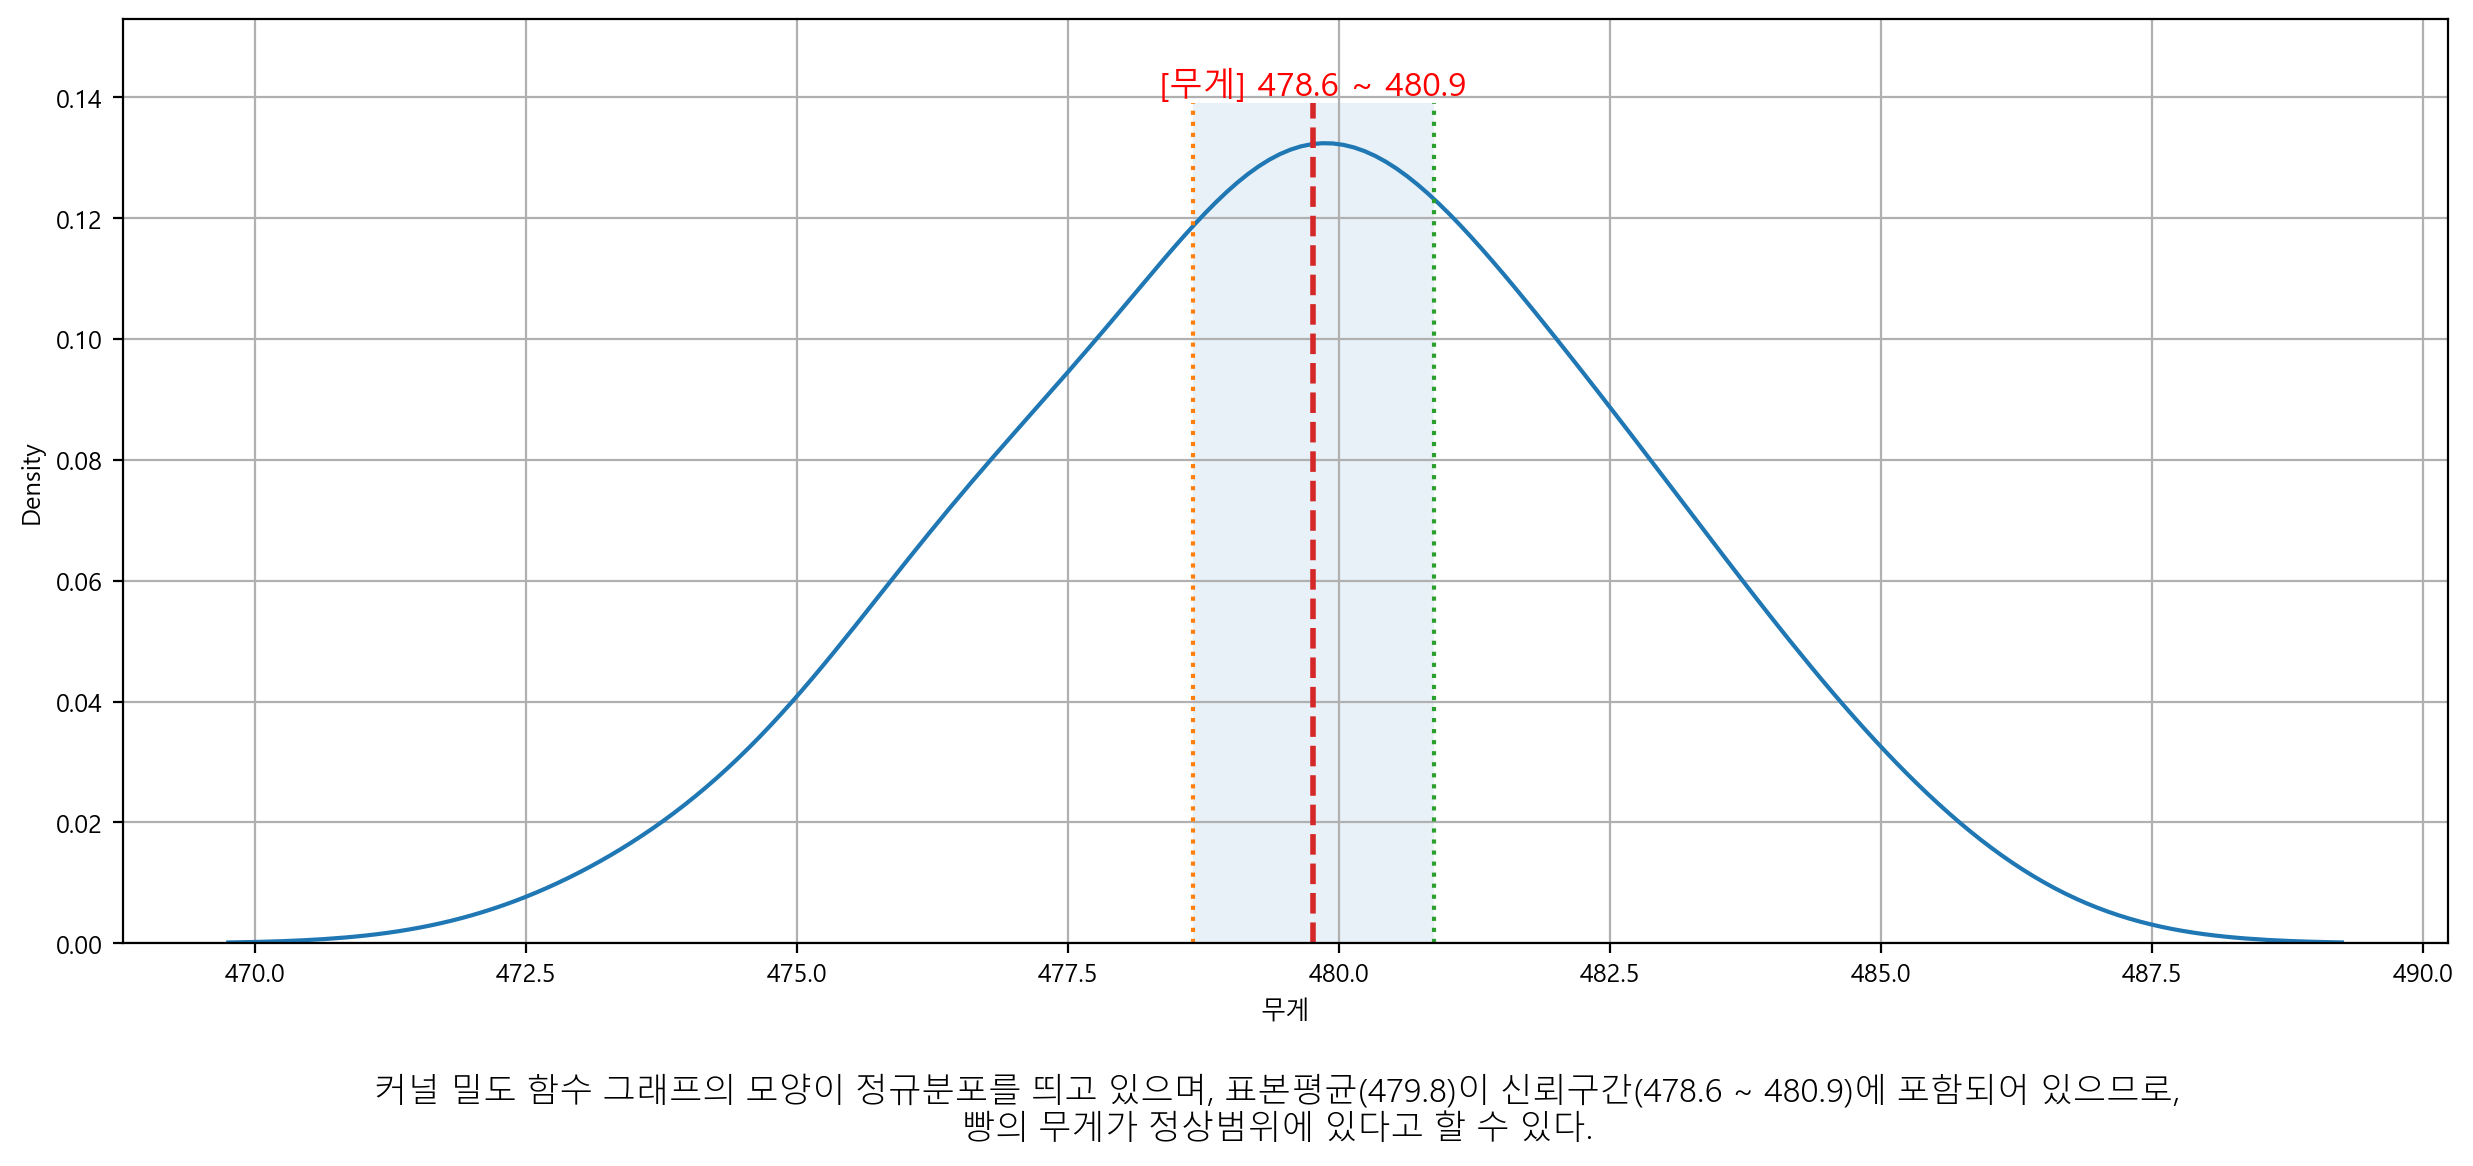

In [4]:
plt.figure()

data = df1['무게']                           # 데이터만 추출
max = data.max()                                # 최대값
clevel = 0.95                                   # 신뢰수준
dof = len(data) - 1                             # 자유도
sample_mean = data.mean()                       # 표본평균
sample_std = data.std(ddof=1)                   # 표본표준편차
sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

sb.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [ymin, ymax], linestyle=':')
plt.plot([cmax, cmax], [ymin, ymax], linestyle=':')
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [ymin, ymax], linestyle='--', linewidth=2)

plt.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 12, "color": "red"})

plt.ylim(0, ymax*1.1)

txt = """커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 표본평균({:.1f})이 신뢰구간({:.1f} ~ {:.1f})에 포함되어 있으므로,
빵의 무게가 정상범위에 있다고 할 수 있다.""".format(sample_mean, cmin, cmax)

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

### [3] 데이터의 정규성 검정

In [5]:
s, p = normaltest(df1['무게'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

> `p-value`가 `0.959`이므로 ($P > 0.05$) 정규성을 충족한다.


### [4] 빵의 무게가  `500`과 달려졌는지 여부

#### T검증 수행

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 빵의 평균 무게 | $\mu$           |                                            |
| 귀무가설($H_0$)    | $\mu = 500$    | 빵의 평균 무게는 `500`과 차이가 없다. |
| 대립가설($H_1$)    | $\mu \neq 500$ | 빵의 평균 무게는 `500`과 차이가 있다. |


In [6]:
s, p = ttest_1samp(df1['무게'], 24.3)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: 844.410, p-value: 0.000, 대립가설 채택'

> 출력에서 단일표본 T검정에 대한 유의확률값이 `0.000`로 통상적인 유의수준 0.05보다 작으므로 `유의수준 0.05에서 빵의무게를 25일간 측정한 무게가 추출된 모집단의 평균인 빵의 평균 무게가 500이라고 할 수 없다.`

### [5] 빵의 평균 무게가 500보다 작은지 확인


| 구분            | 수식            | 설명                                      |
| --------------- | --------------- | ----------------------------------------- |
| 귀무가설($H_0$) | $\mu \geqq 500$ | 빵의 평균 무게는 `500`보다 작지 않다 |
| 대립가설($H_1$) | $\mu \lt 500$  | 빵의 평균 무게는 `500`보다 작다      |

In [7]:
s, p = ttest_1samp(df1['무게'], 500, alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

> `p-value`가 `0.05`보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 빵의 평균 무게는 `500`보다 작다.

> 따라서 베이커리에 찾아가 항의를 해야한다.

## 문제 2

어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.

각 원료에서 주성분 A의 함량은 다음과 같다. 단, 함량은 정규분포를 따른다고 가정한다.

이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

<table>
    <tr>
        <th>상표1</th>
        <td>80.4</td>
        <td>78.2</td>
        <td>80.1</td>
        <td>77.1</td>
        <td>79.6</td>
        <td>80.4</td>
        <td>81.6</td>
        <td>79.9</td>
        <td>84.4</td>
        <td>80.9</td>
        <td>83.1</td>
    </tr>
    <tr>
        <th>상표2</th>
        <td>80.1</td>
        <td>81.2</td>
        <td>79.5</td>
        <td>78</td>
        <td>76.1</td>
        <td>77</td>
        <td>80.1</td>
        <td>79.9</td>
        <td>78.8</td>
        <td>80.8</td>
        <td>79.3</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/material.xlsx

### [1] 데이터 가져오기

In [8]:
df2 = read_excel('https://data.hossam.kr/mldata/material.xlsx')
df2 # 독립표본 T Test

,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0
5,80.4,82.3
6,81.6,81.0
7,79.9,80.2
8,84.4,82.2
9,80.9,82.3


### [2] 신뢰구간 확인


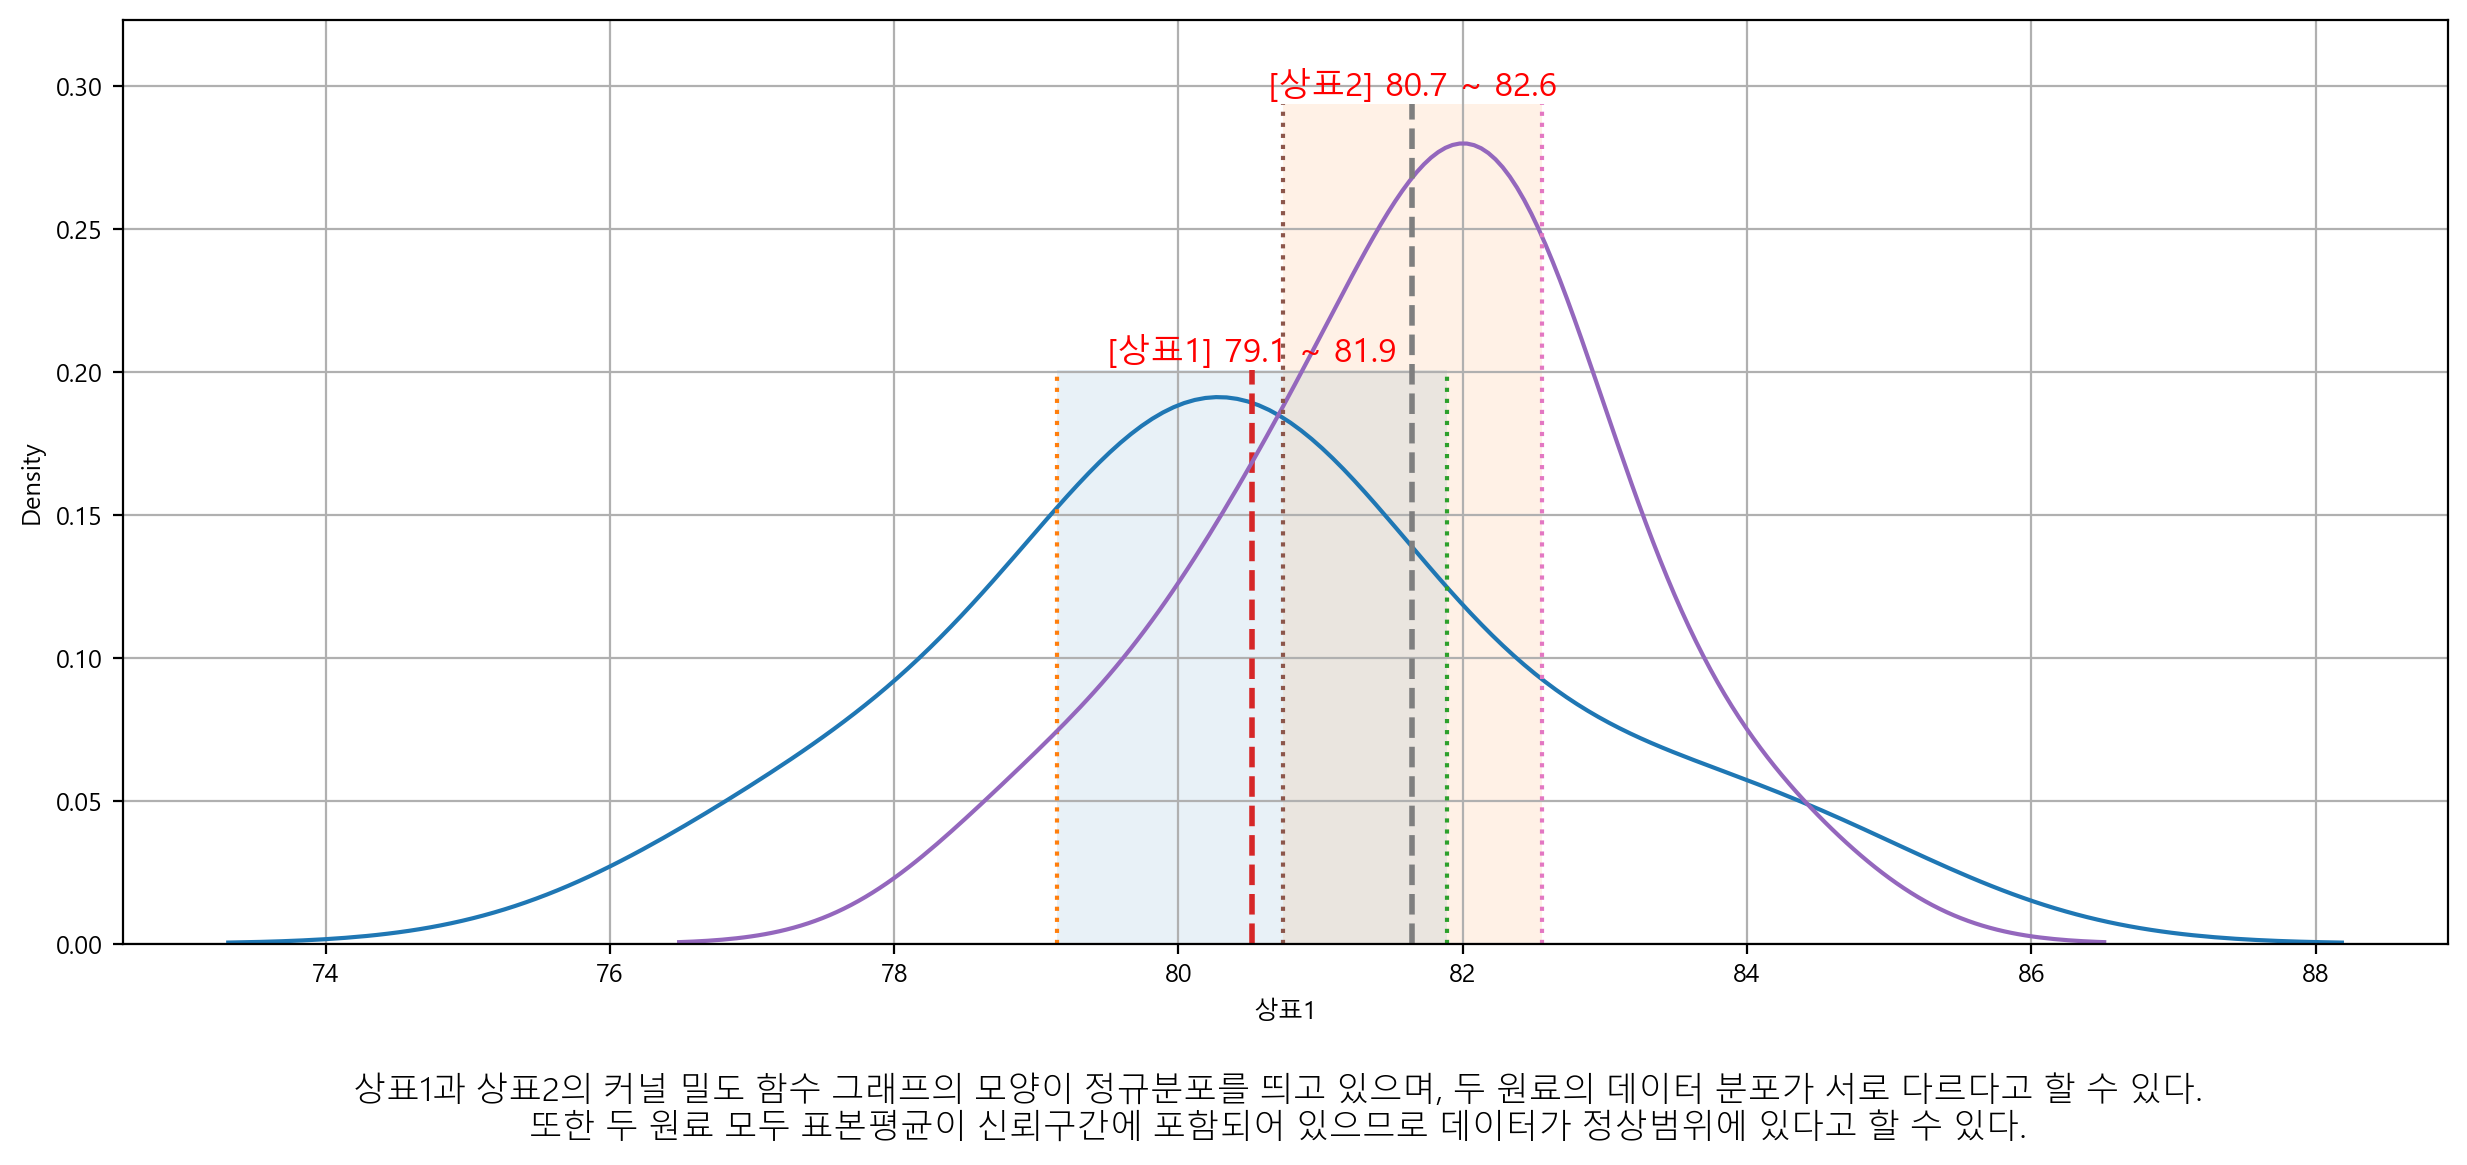

In [9]:
plt.figure()

for c in df2.columns:
    #print(c)
    
    data = df2[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()
    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
plt.ylim(0, ymax*1.1)

txt = """상표1과 상표2의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 원료의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 원료 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [10]:
for c in df2.columns:
    s, p = normaltest(df2[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[상표1] statistic: 0.638, p-value: 0.727, 정규성 충족 여부: True
[상표2] statistic: 0.775, p-value: 0.679, 정규성 충족 여부: True


> `p-value`가  둘 다 0.05보다 크므로 둘 다 정규성을 충족한다.


#### (2) 등분산성

In [11]:
normal_dist = True      # 정규성 만족 여부
data = df2.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 1.555, p-value: 0.212, 등분산성 충족 여부: True


> `p-value`가 `0.429`이므로 ($P > 0.05$) 등분산성을 충족한다.


### [4] 두 원료간 주성분 A의 함량의 차이가 있는지 검정

#### T검증 수행

| 구분 | 수식 | 내용 |
|---|---|---|
| 상표1의 주성분 A의 함량 | $\mu(1)$ | |
| 상표2의 주성분 A의 함량 | $\mu(2)$ | |
| 귀무가설($H_0$) | $\mu(1) = \mu(2)$ | 두 원료간 주성분 A의 함량은 차이가 없다. |
| 대립가설($H_1$) | $\mu(1) \neq \mu(2)$ | 두 원료간 주성분 A의 함량은 차이가 있다. |


In [12]:
s, p = ttest_ind(df2['상표1'], df2['상표2'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -1.528, p-value: 0.142, 귀무가설 채택'

> `p-value`가 0.05보다 크므로($p > 0.05$) 귀무가설을 기각할 수 없다. 즉, 상표1과 상표2의 두 원료 간 주성분 A의 함량은 차이가 없다.


### [5] 가설검정 시각화


#### (1) 데이터 전처리

In [13]:
melt2 = melt(df2, var_name='group', value_name='value')
melt2

,group,value
0,상표1,80.4
1,상표1,78.2
2,상표1,80.1
3,상표1,77.1
4,상표1,79.6
5,상표1,80.4
6,상표1,81.6
7,상표1,79.9
8,상표1,84.4
9,상표1,80.9


#### (2) 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


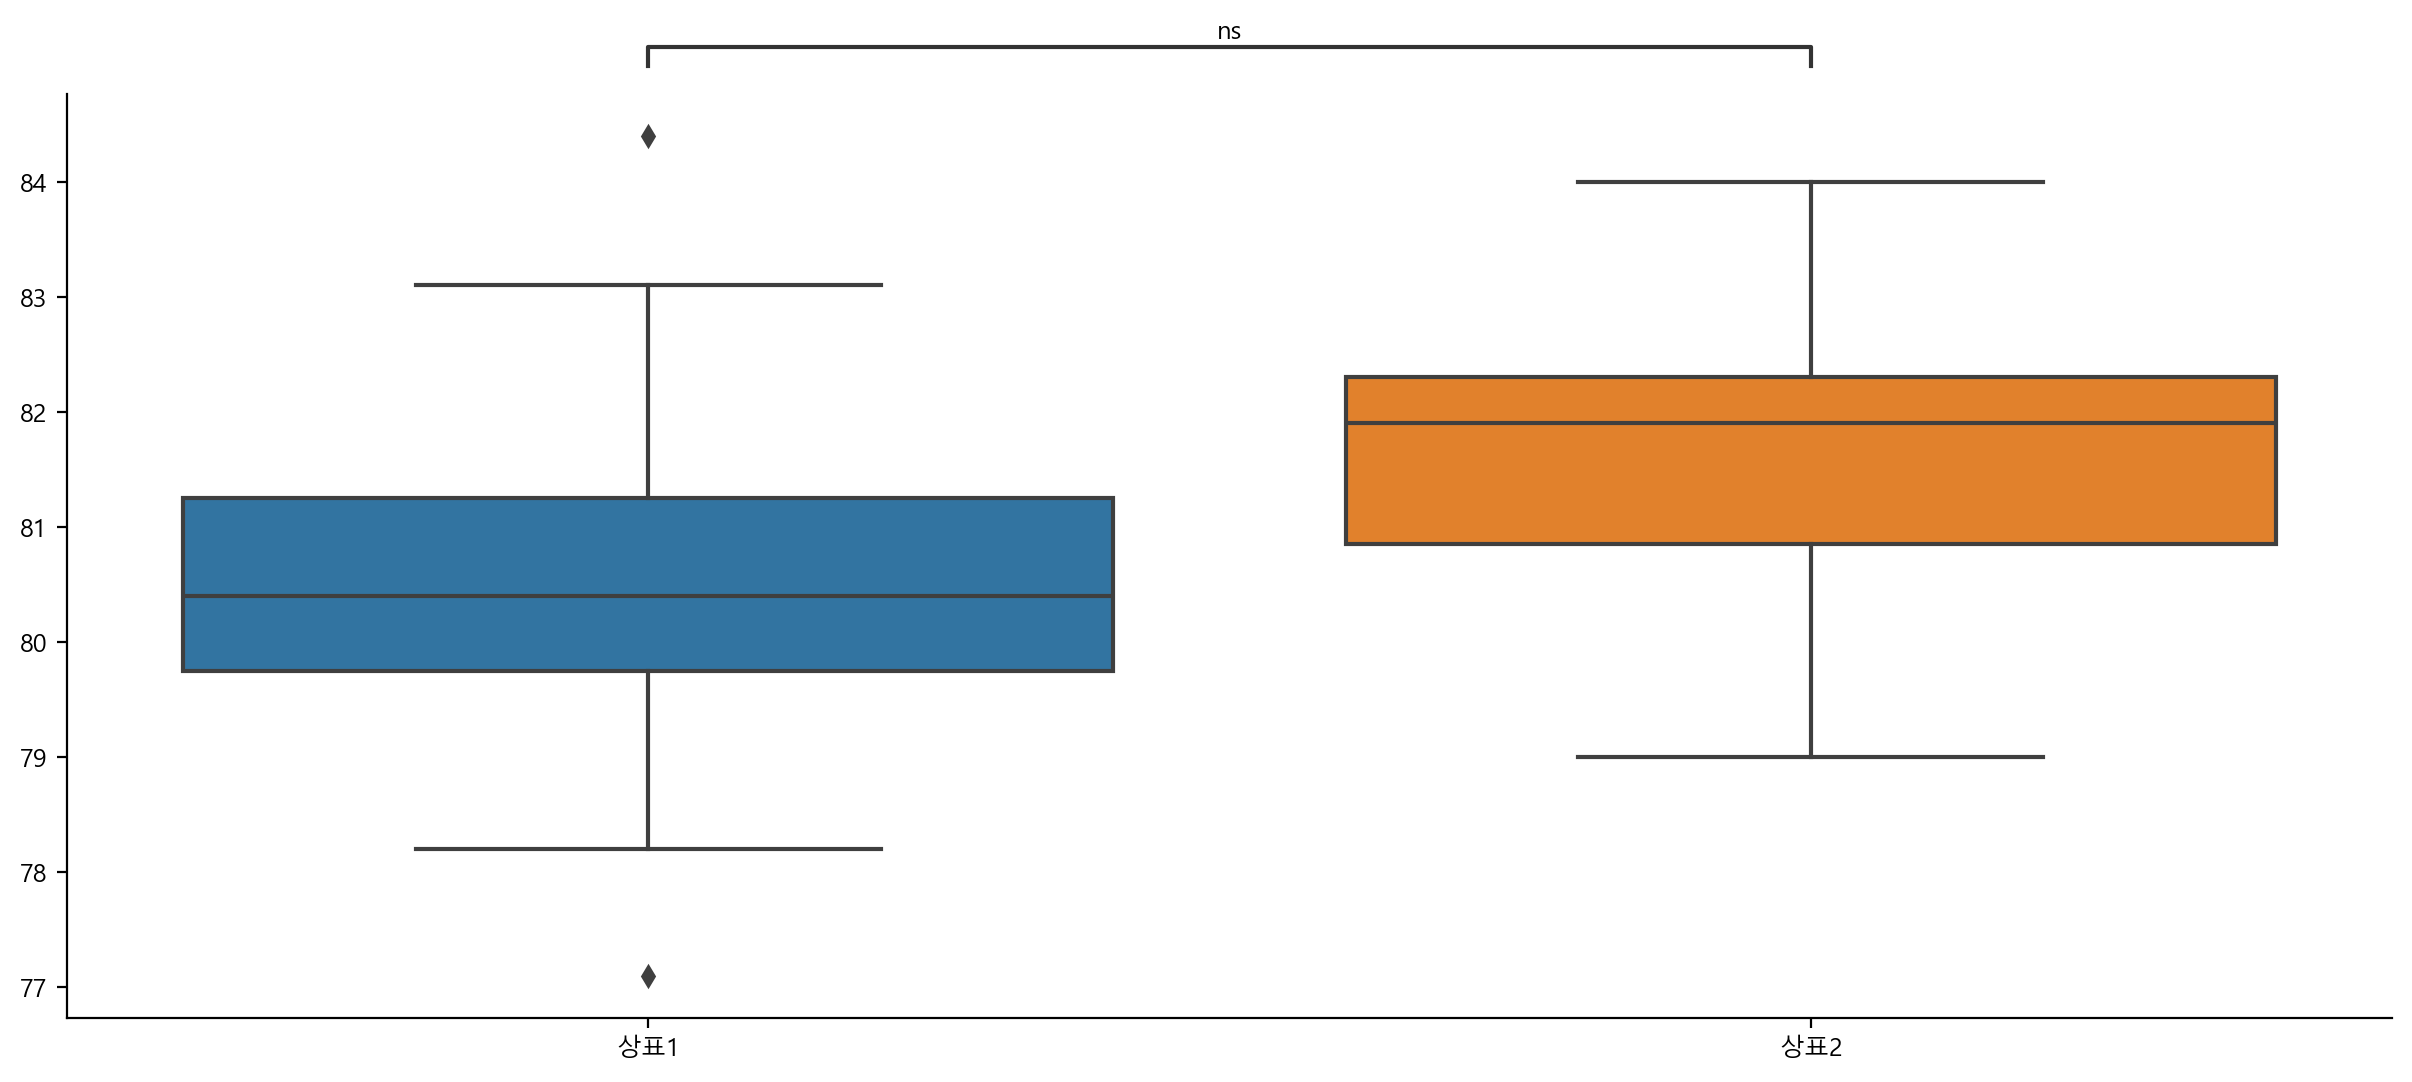

In [14]:
plt.figure()
ax = sb.boxplot(data=melt2, x='group', y='value')

annotator = Annotator(ax, data=melt2, x='group', y='value', pairs=[('상표1', '상표2')])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
#  text_format = 'star', 'simple'
annotator.apply_and_annotate()

sb.despine()
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()


## 문제 3

특정 피임약이 사용자의 혈압을 저하시키는지 조사하고자 한다.

이를 위해 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록했다.

얻어진 데이터는 다음과 같다. 피임약 복용이 혈압에 영향을 주는지 분석하라.

<table>
    <tr>
        <th>복용전</th>
        <td>70</td>
        <td>80</td>
        <td>72</td>
        <td>76</td>
        <td>76</td>
        <td>76</td>
        <td>72</td>
        <td>78</td>
        <td>82</td>
        <td>64</td>
        <td>74</td>
        <td>92</td>
        <td>74</td>
        <td>68</td>
        <td>84</td>
    </tr>
    <tr>
        <th>복용후</th>
        <td>68</td>
        <td>72</td>
        <td>62</td>
        <td>70</td>
        <td>58</td>
        <td>66</td>
        <td>68</td>
        <td>52</td>
        <td>64</td>
        <td>72</td>
        <td>74</td>
        <td>60</td>
        <td>74</td>
        <td>72</td>
        <td>74</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/blood_pressure.xlsx

### [1] 데이터 가져오기

In [15]:
df3 = read_excel('https://data.hossam.kr/mldata/blood_pressure.xlsx')
df3 # 대응표본 T Test

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


### [2] 신뢰구간 확인


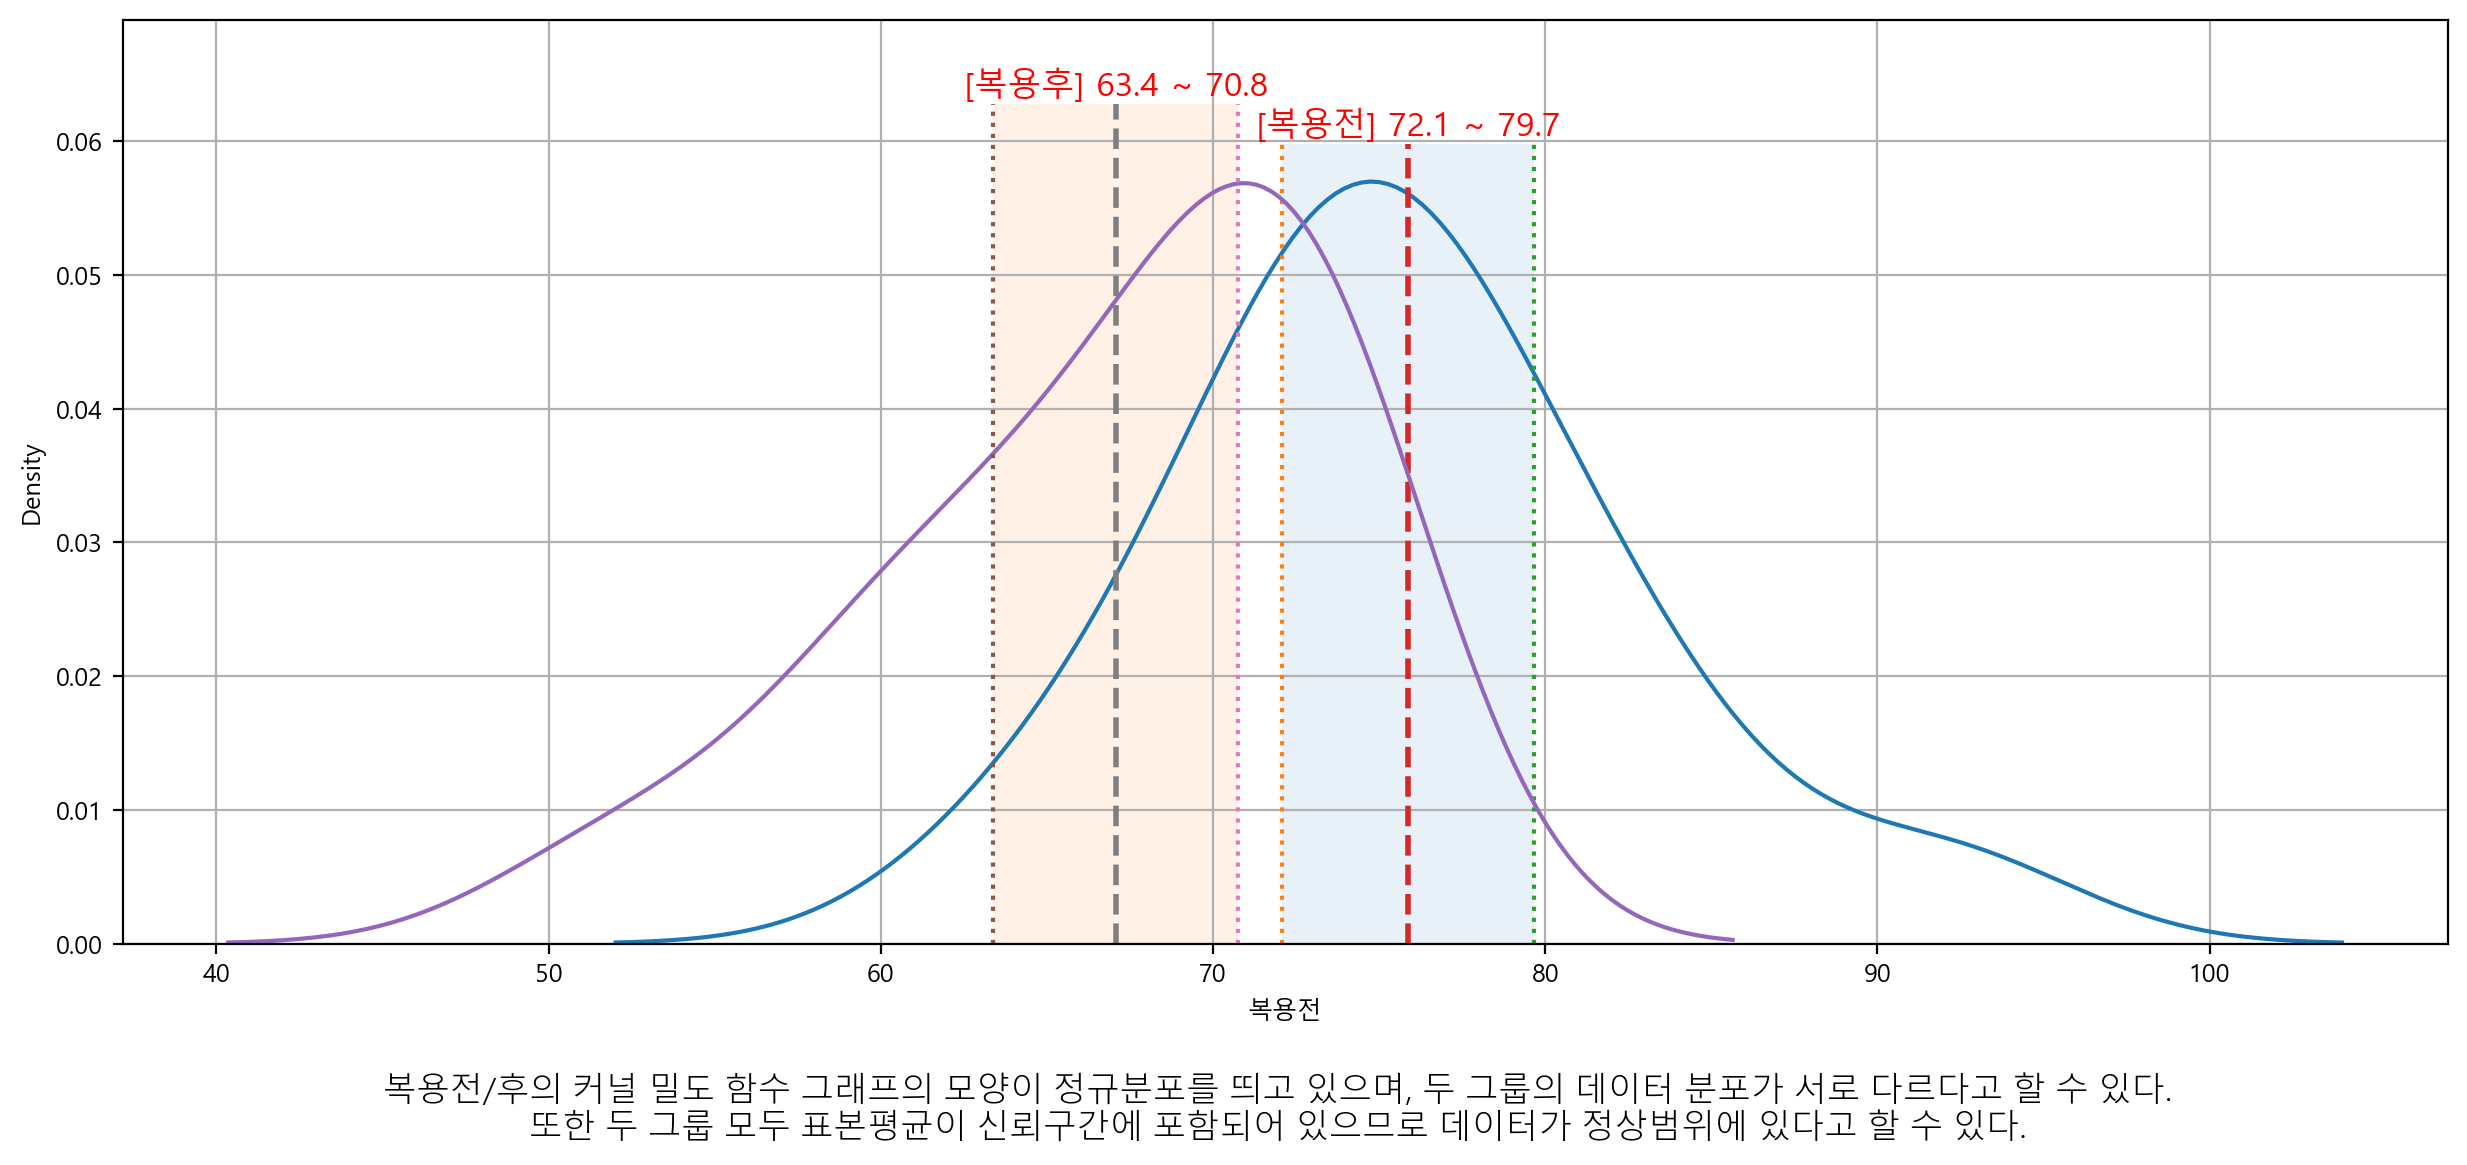

In [16]:
plt.figure()

for c in df3.columns:
    #print(c)
    
    data = df3[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """복용전/후의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [17]:
for c in df3.columns:
    s, p = normaltest(df3[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[복용전] statistic: 2.591, p-value: 0.274, 정규성 충족 여부: True
[복용후] statistic: 2.656, p-value: 0.265, 정규성 충족 여부: True


> `p-value`가  둘 다 0.05보다 크므로 둘 다 정규성을 충족한다.


#### (2) 등분산성

In [18]:
normal_dist = True      # 정규성 만족 여부
data = df3.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.011, p-value: 0.916, 등분산성 충족 여부: True


> `p-value`가 `0.916`이므로 ($P > 0.05$) 등분산성을 충족한다.


### [4] 특정 피임약 복용 전/후 사용자의 혈압에 차이가 있는지 검증

#### T검증 수행

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 복용전 사용자의 혈압 | $\mu(복용전)$ | |
| 복용후 사용자의 혈압 | $\mu(복용후)$ | |
| 귀무가설($H_0$) | $\mu(복용전) = \mu(복용후)$ | 피임약 복용 전과 후 사용자의 혈압에는 차이가 없다 |
| 대립가설($H_1$) | $\mu(복용전) \neq \mu(복용후)$ | 피임약 복용 전과 후 사용자의 혈압에는 차이가 있다 |

In [19]:
s, p = ttest_rel(df3['복용전'], df3['복용후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.105, p-value: 0.008, 대립가설 채택'

> 출력에서 단일표본 T검정에 대한 유의확률값이 `0.008`로 통상적인 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
> 
> 즉, 특정 피임약 복용 전/후 사용자의 혈압에 차이가 있다고 결론 내릴 수 있다.

### [5] 피임약 복용 후의 혈압이 피임약 복용 전의 혈압보다 더 작은지 검정

| 구분 | 수식 | 내용 |
|---|---|---|
| 귀무가설($H_0$) | $\mu(복용후) \leqq \mu(복용전)$ | 피임약 복용 후의 혈압이 피임약 복용 전의 혈압보다 작지 않다 |
| 대립가설($H_1$) | $\mu(복용후) > \mu(복용전)$ | 피임약 복용 후의 혈압이 피임약 복용 전의 혈압보다 작다 |

In [20]:
s, p = ttest_rel(df3['복용후'], df3['복용전'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -3.105, p-value: 0.004, 대립가설 채택'

> `p-value`가 `0.05`보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 특정 피임약 복용 후의 혈압이 피임약 복용 전의 혈압보다 더 작다.

### [6] 가설검정 시각화


#### (1) 데이터 전처리

In [21]:
melt3 = melt(df3, var_name='group', value_name='value')
melt3

,group,value
0,복용전,70
1,복용전,80
2,복용전,72
3,복용전,76
4,복용전,76
5,복용전,76
6,복용전,72
7,복용전,78
8,복용전,82
9,복용전,64


#### (2) 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


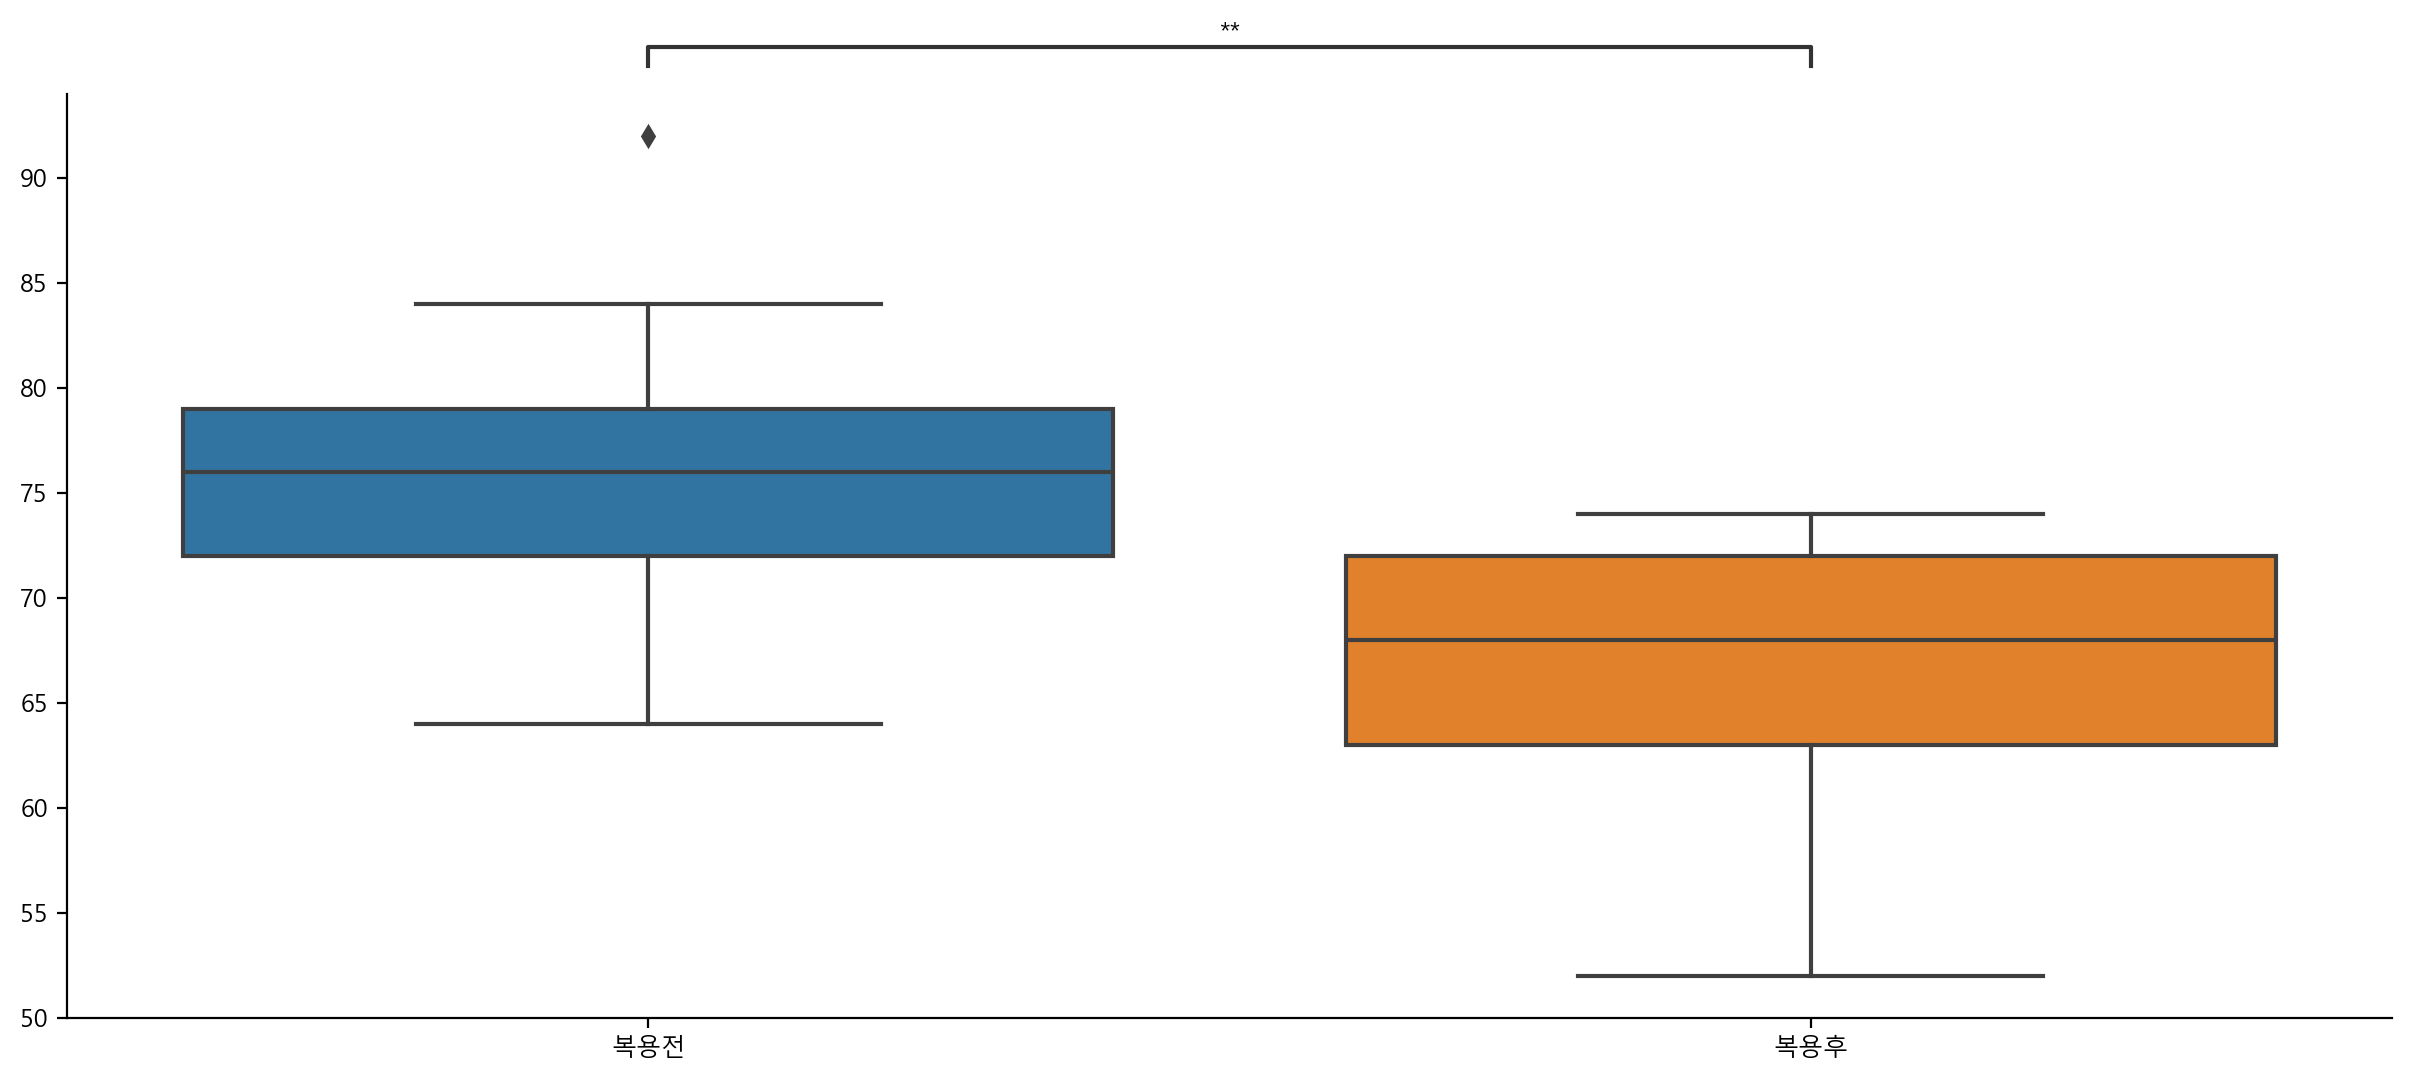

In [22]:
config = {
    "data": melt3,
    "x": "group",
    "y": "value",
    "pairs": [("복용전", "복용후")],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()
plt.xlabel('')
plt.ylabel('')
sb.despine()
plt.show()
plt.close()

## 문제 4

고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하기 위하여, 어떤 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시하여 다음의 데이터를 얻었다.

감량 전과 후에 달리기 속도에 차이가 있는지 분석하라

<table>
    <tr>
        <th>감량전</th>
        <td>14.5</td>
        <td>13.4</td>
        <td>13</td>
        <td>14.5</td>
        <td>13.3</td>
        <td>14.2</td>
        <td>13.6</td>
        <td>13.9</td>
        <td>13.2</td>
        <td>13</td>
    </tr>
    <tr>
        <th>감량후</th>
        <td>14.3</td>
        <td>13.4</td>
        <td>13.1</td>
        <td>13.9</td>
        <td>13.1</td>
        <td>13.9</td>
        <td>13.6</td>
        <td>14</td>
        <td>12.8</td>
        <td>12.8</td>
    </tr>
</table>

> https://data.hossam.kr/mldata/runner_diet.xlsx

### [1] 데이터 가져오기

In [23]:
df4 = read_excel('https://data.hossam.kr/mldata/runner_diet.xlsx')
df4 # 대응표본 T Test

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


### [2] 신뢰구간 확인


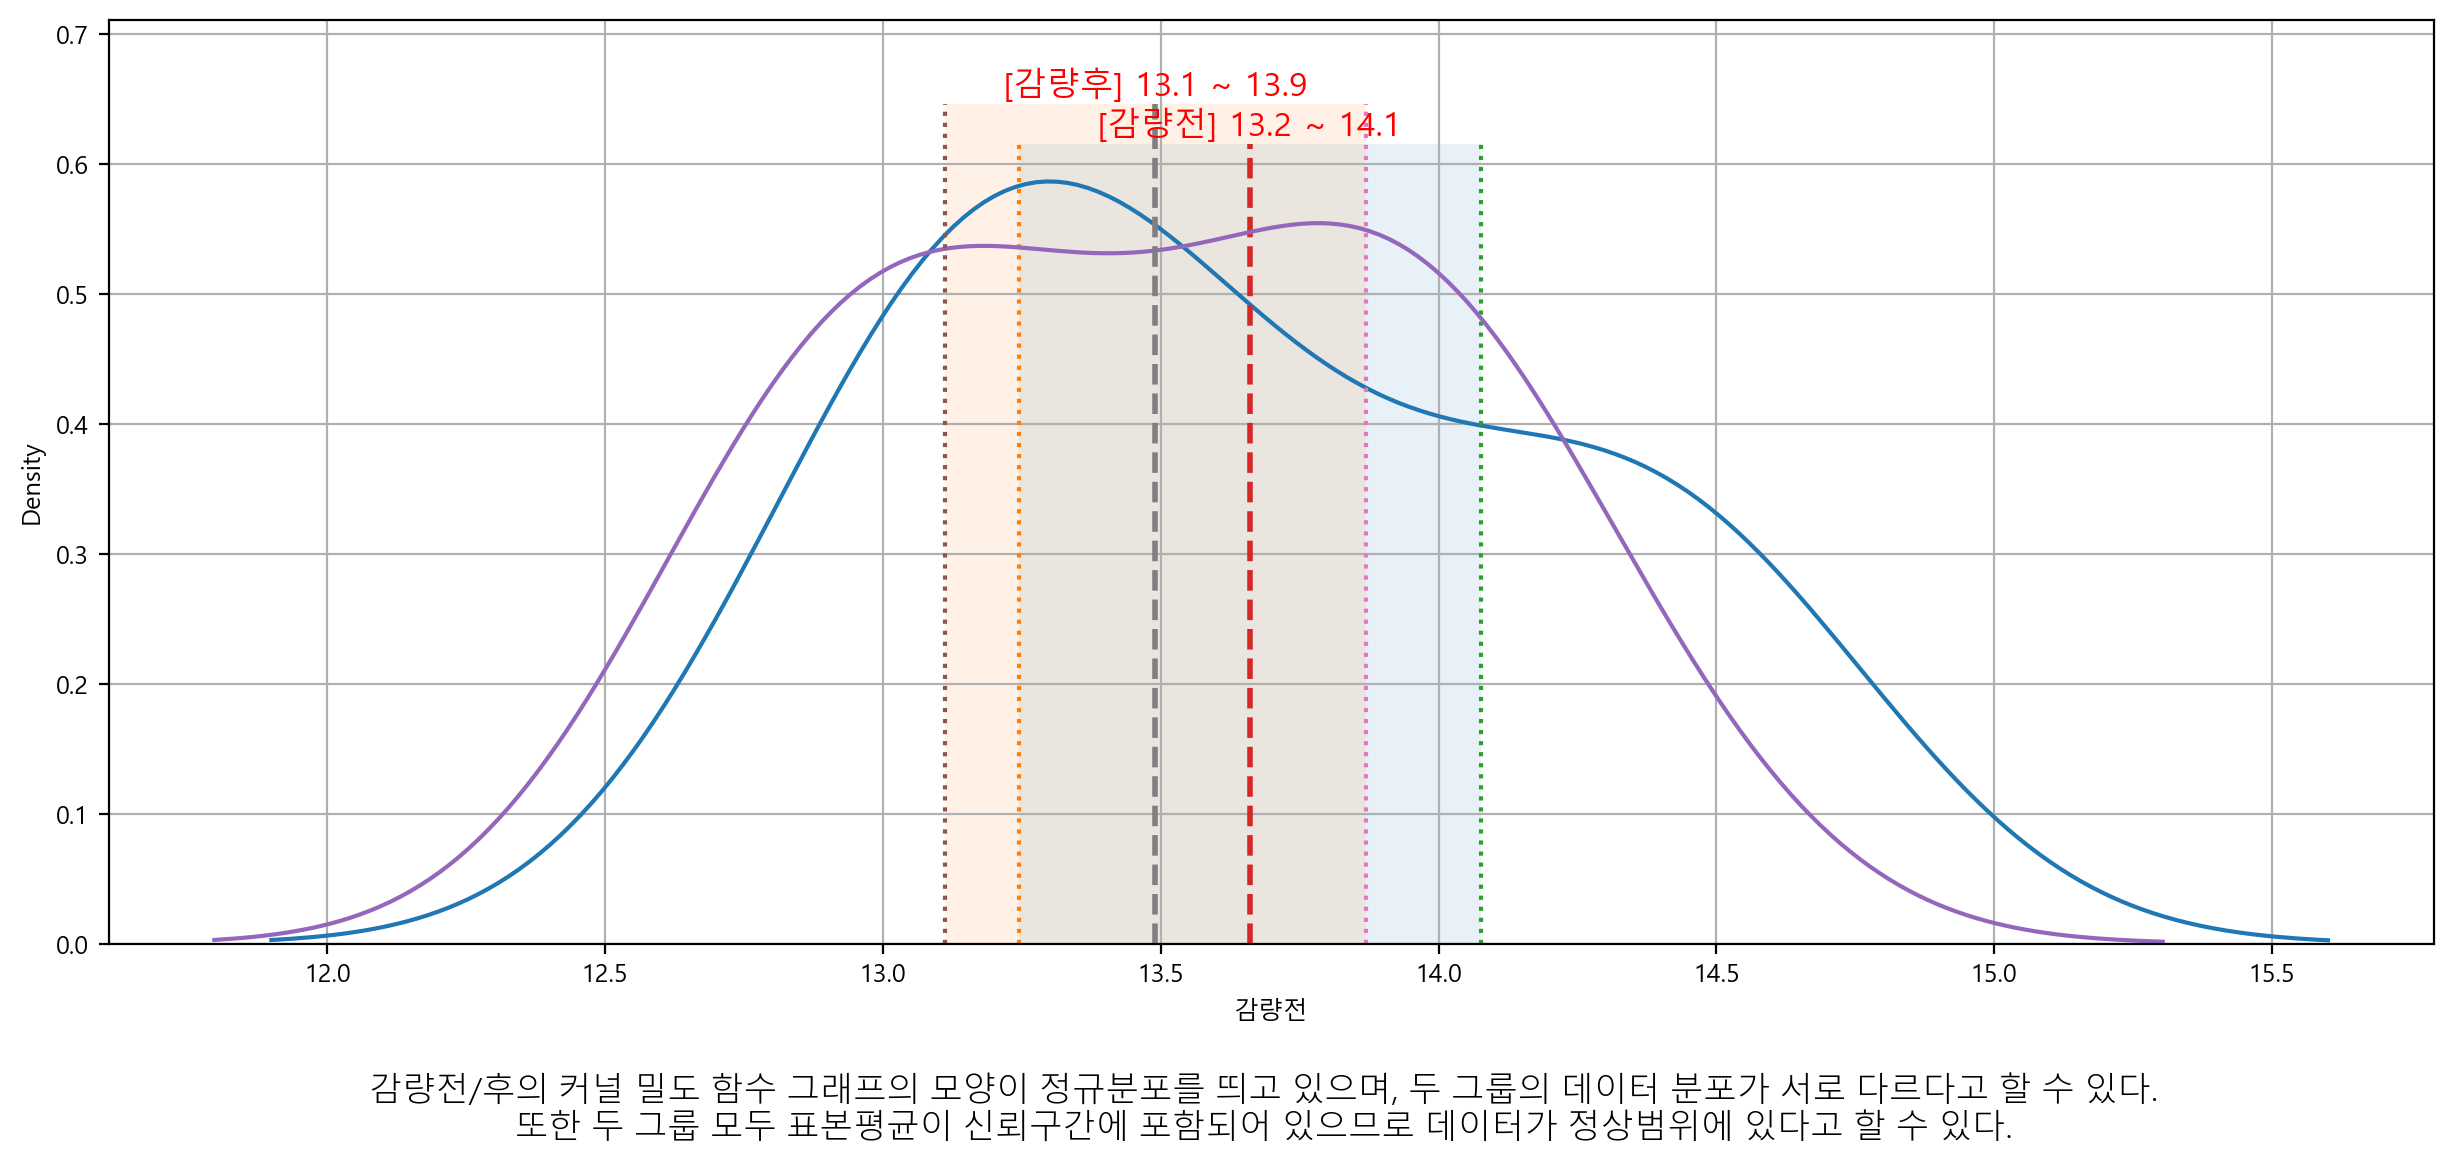

In [24]:
plt.figure()

for c in df4.columns:
    #print(c)
    
    data = df4[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
txt = """감량전/후의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [25]:
for c in df4.columns:
    s, p = normaltest(df4[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[감량전] statistic: 2.063, p-value: 0.356, 정규성 충족 여부: True
[감량후] statistic: 1.647, p-value: 0.439, 정규성 충족 여부: True


> `p-value`가  둘 다 0.05보다 크므로 둘 다 정규성을 충족한다.


#### (2) 등분산성

In [26]:
normal_dist = True      # 정규성 만족 여부
data = df4.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.073, p-value: 0.787, 등분산성 충족 여부: True


> `p-value`가 `0.787`이므로 ($P > 0.05$) 등분산성을 충족한다.


### [4] 체중감량 전/후 달리기 속도에 차이가 있는지 검증

#### T검증 수행

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 체중감량전 100m 달리기 소요 시간 | $\mu(감량전)$ | |
| 체중감량후 100m 달리기 소요 시간 | $\mu(감량후)$ | |
| 귀무가설($H_0$) | $\mu(감량전) = \mu(감량후)$ | 체중감량 전과 후 달리기 속도에는 차이가 없다 |
| 대립가설($H_1$) | $\mu(감량전) \neq \mu(감량후)$ | 체중감량 전과 후 달리기 속도에는 차이가 있다 |

In [27]:
s, p = ttest_rel(df4['감량전'], df4['감량후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.042, 대립가설 채택'

> `p-value`가 `0.05`보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 체중감량전의 달리기 속도와 체중감량 후의 달리기 속도에는 차이가 있다.

### [5] 체중감량후의 달리기 속도가 체중감량 전의 달리기 속도보다 느린지 검증

| 구분 | 수식 | 내용 |
|---|---|---|
| 귀무가설($H_0$) | $\mu(감량후) \leqq \mu(감량전)$ | 체중감량 후의 달리기 속도는 체중 감량 전의 달리기 속보다 작지 않다 |
| 대립가설($H_1$) | $\mu(감량후) > \mu(감량전)$ | 체중감량 후의 달리기 속도는 체중 감량 전의 달리기 속보다 작다 |

In [28]:
s, p = ttest_rel(df4['감량후'], df4['감량전'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -2.375, p-value: 0.021, 대립가설 채택'

> `p-value`가 `0.05`보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 체중감량 후의 달리기 속도는 체중 감량 전의 달리기 속보다 작다중

### [6] 가설검정 시각화


#### (1) 데이터 전처리

In [29]:
melt4 = melt(df4, var_name='group', value_name='value')
melt4

,group,value
0,감량전,14.5
1,감량전,13.4
2,감량전,13.0
3,감량전,14.5
4,감량전,13.3
5,감량전,14.2
6,감량전,13.6
7,감량전,13.9
8,감량전,13.2
9,감량전,13.0


#### (2) 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 vs. 감량후: t-test paired samples, P_val:4.155e-02 t=2.375e+00


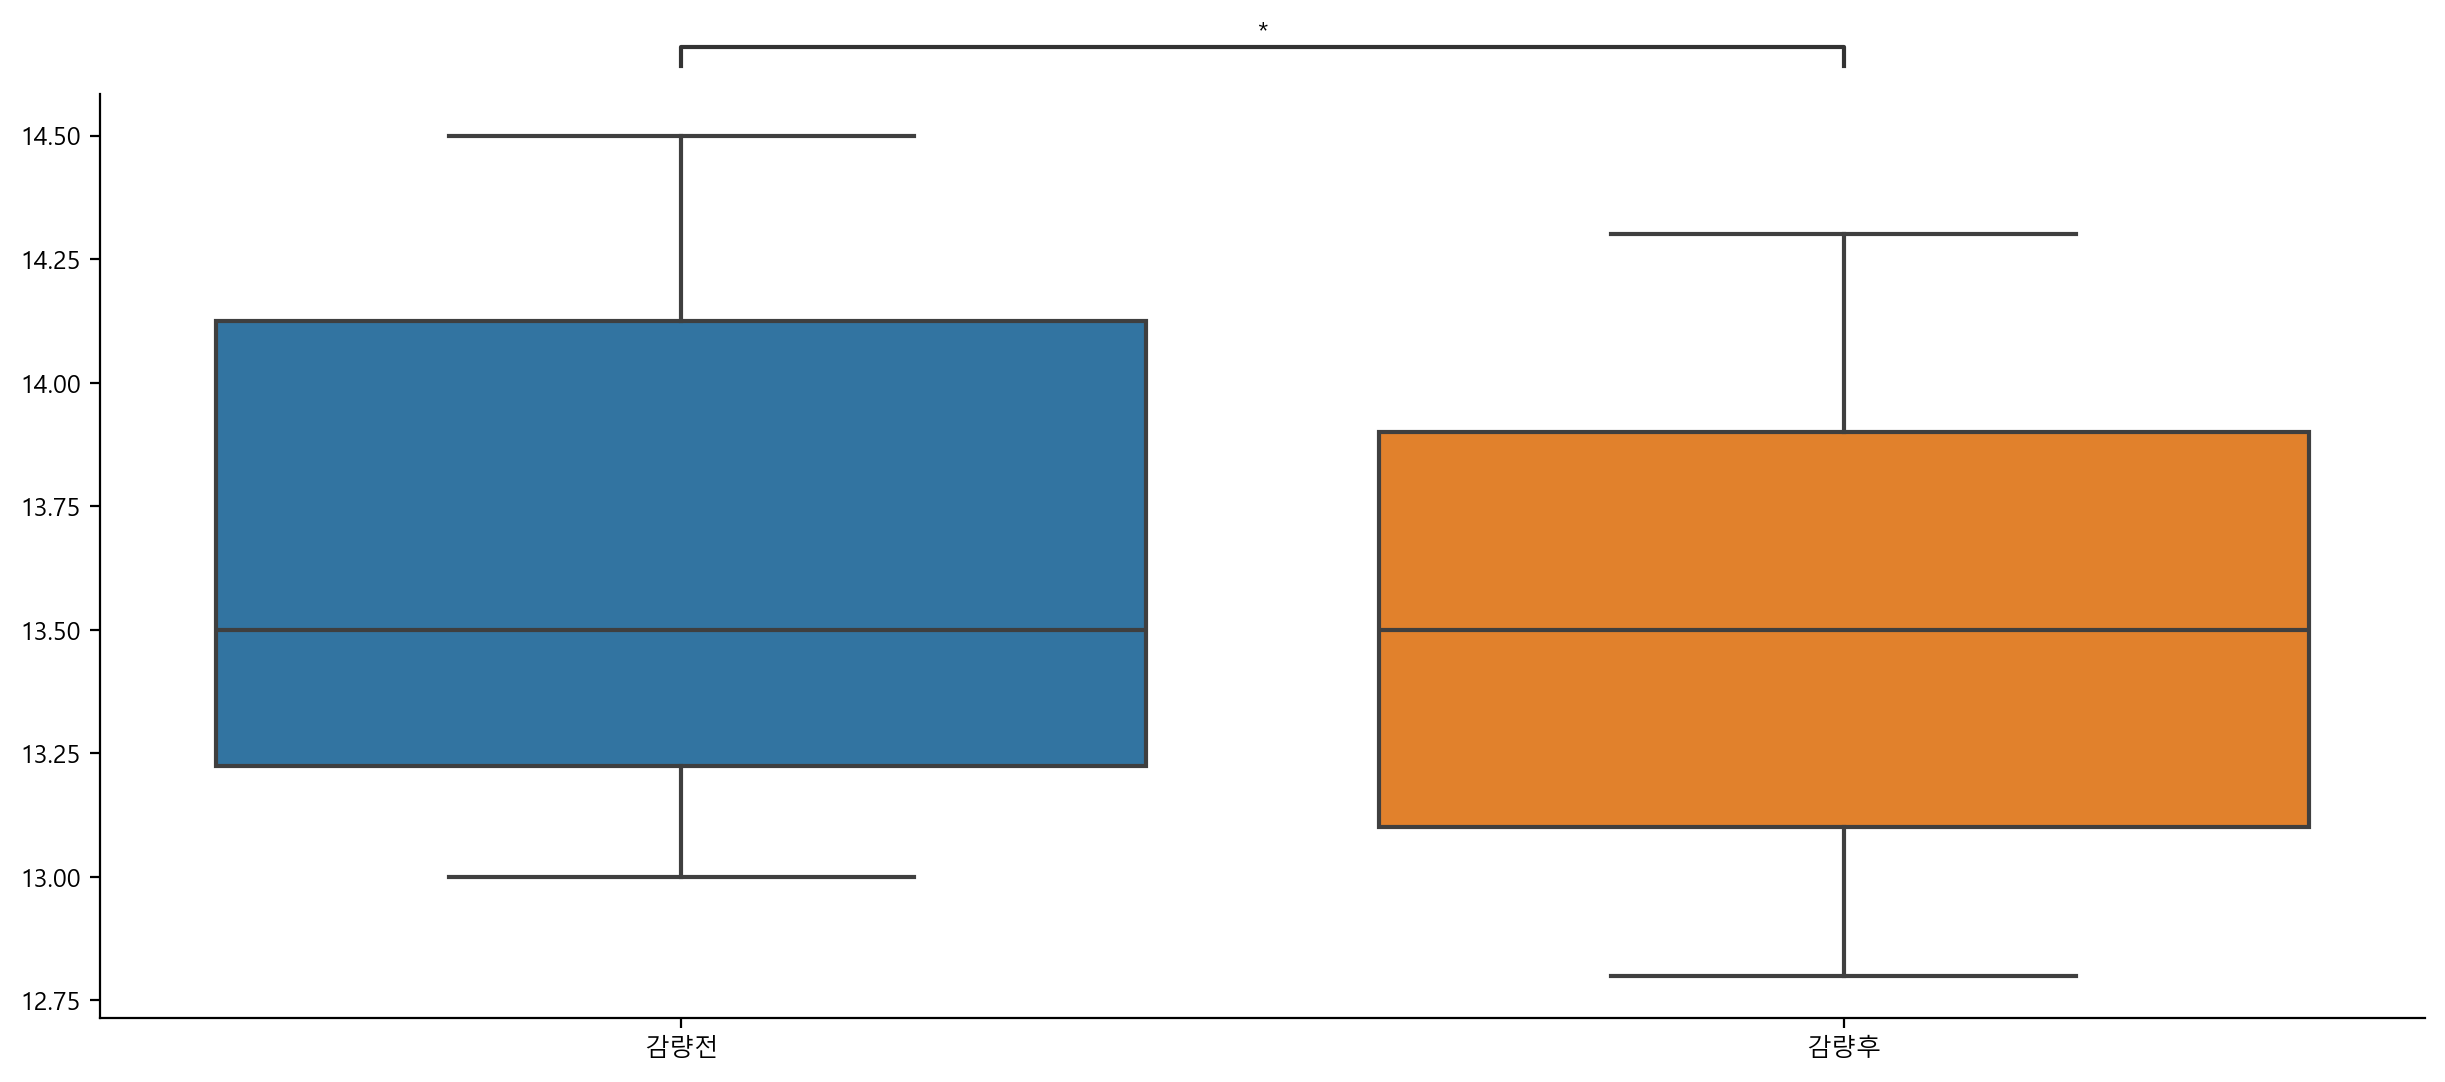

In [30]:
config = {
    "data": melt4,
    "x": "group",
    "y": "value",
    "pairs": [("감량전", "감량후")],
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()
plt.xlabel('')
plt.ylabel('')
sb.despine()
plt.show()
plt.close()

## 문제 5

고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 다음의 체력 데이터를 얻었다.

감량 전과 감량 후 간에 차이가 있는가의 대응비교를 악력, 윗몸일으키기, 턱걸이에 대하여 실시하고 분석하라.

| 이름  | 감량전 악력 | 감량후 악력 | 감량전 윗몸일으키기 | 감량후 윗몸일으키기 | 감량전 턱걸이 | 감량후 턱걸이 |
|-----|--------|--------|------------|------------|---------|---------|
| B.S | 43     | 41     | 35         | 41         | 25      | 29      |
| P.J | 42     | 41     | 40         | 44         | 25      | 29      |
| G.G | 52     | 50     | 36         | 41         | 22      | 23      |
| A.L | 53     | 52     | 38         | 42         | 10      | 15      |
| I.H | 44     | 40     | 36         | 42         | 15      | 19      |
| B.Y | 46     | 47     | 39         | 44         | 17      | 19      |
| I.K | 48     | 47     | 35         | 42         | 24      | 26      |
| K.B | 58     | 55     | 34         | 36         | 17      | 18      |
| K.J | 50     | 50     | 33         | 35         | 17      | 20      |
| S.S | 48     | 50     | 39         | 45         | 21      | 25      |
| S.P | 56     | 48     | 37         | 37         | 31      | 35      |
| S.J | 43     | 41     | 33         | 37         | 15      | 22      |

> https://data.hossam.kr/mldata/wrestler_diet.xlsx

### [1] 데이터 가져오기

In [31]:
df5 = read_excel('https://data.hossam.kr/mldata/wrestler_diet.xlsx',index_col='이름')
df5 # 대응표본 T Test

,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
이름,,,,,,
B.S,43,41,35,41,25,29
P.J,42,41,40,44,25,29
G.G,52,50,36,41,22,23
A.L,53,52,38,42,10,15
I.H,44,40,36,42,15,19
B.Y,46,47,39,44,17,19
I.K,48,47,35,42,24,26
K.B,58,55,34,36,17,18
K.J,50,50,33,35,17,20


### [2] 신뢰구간 확인


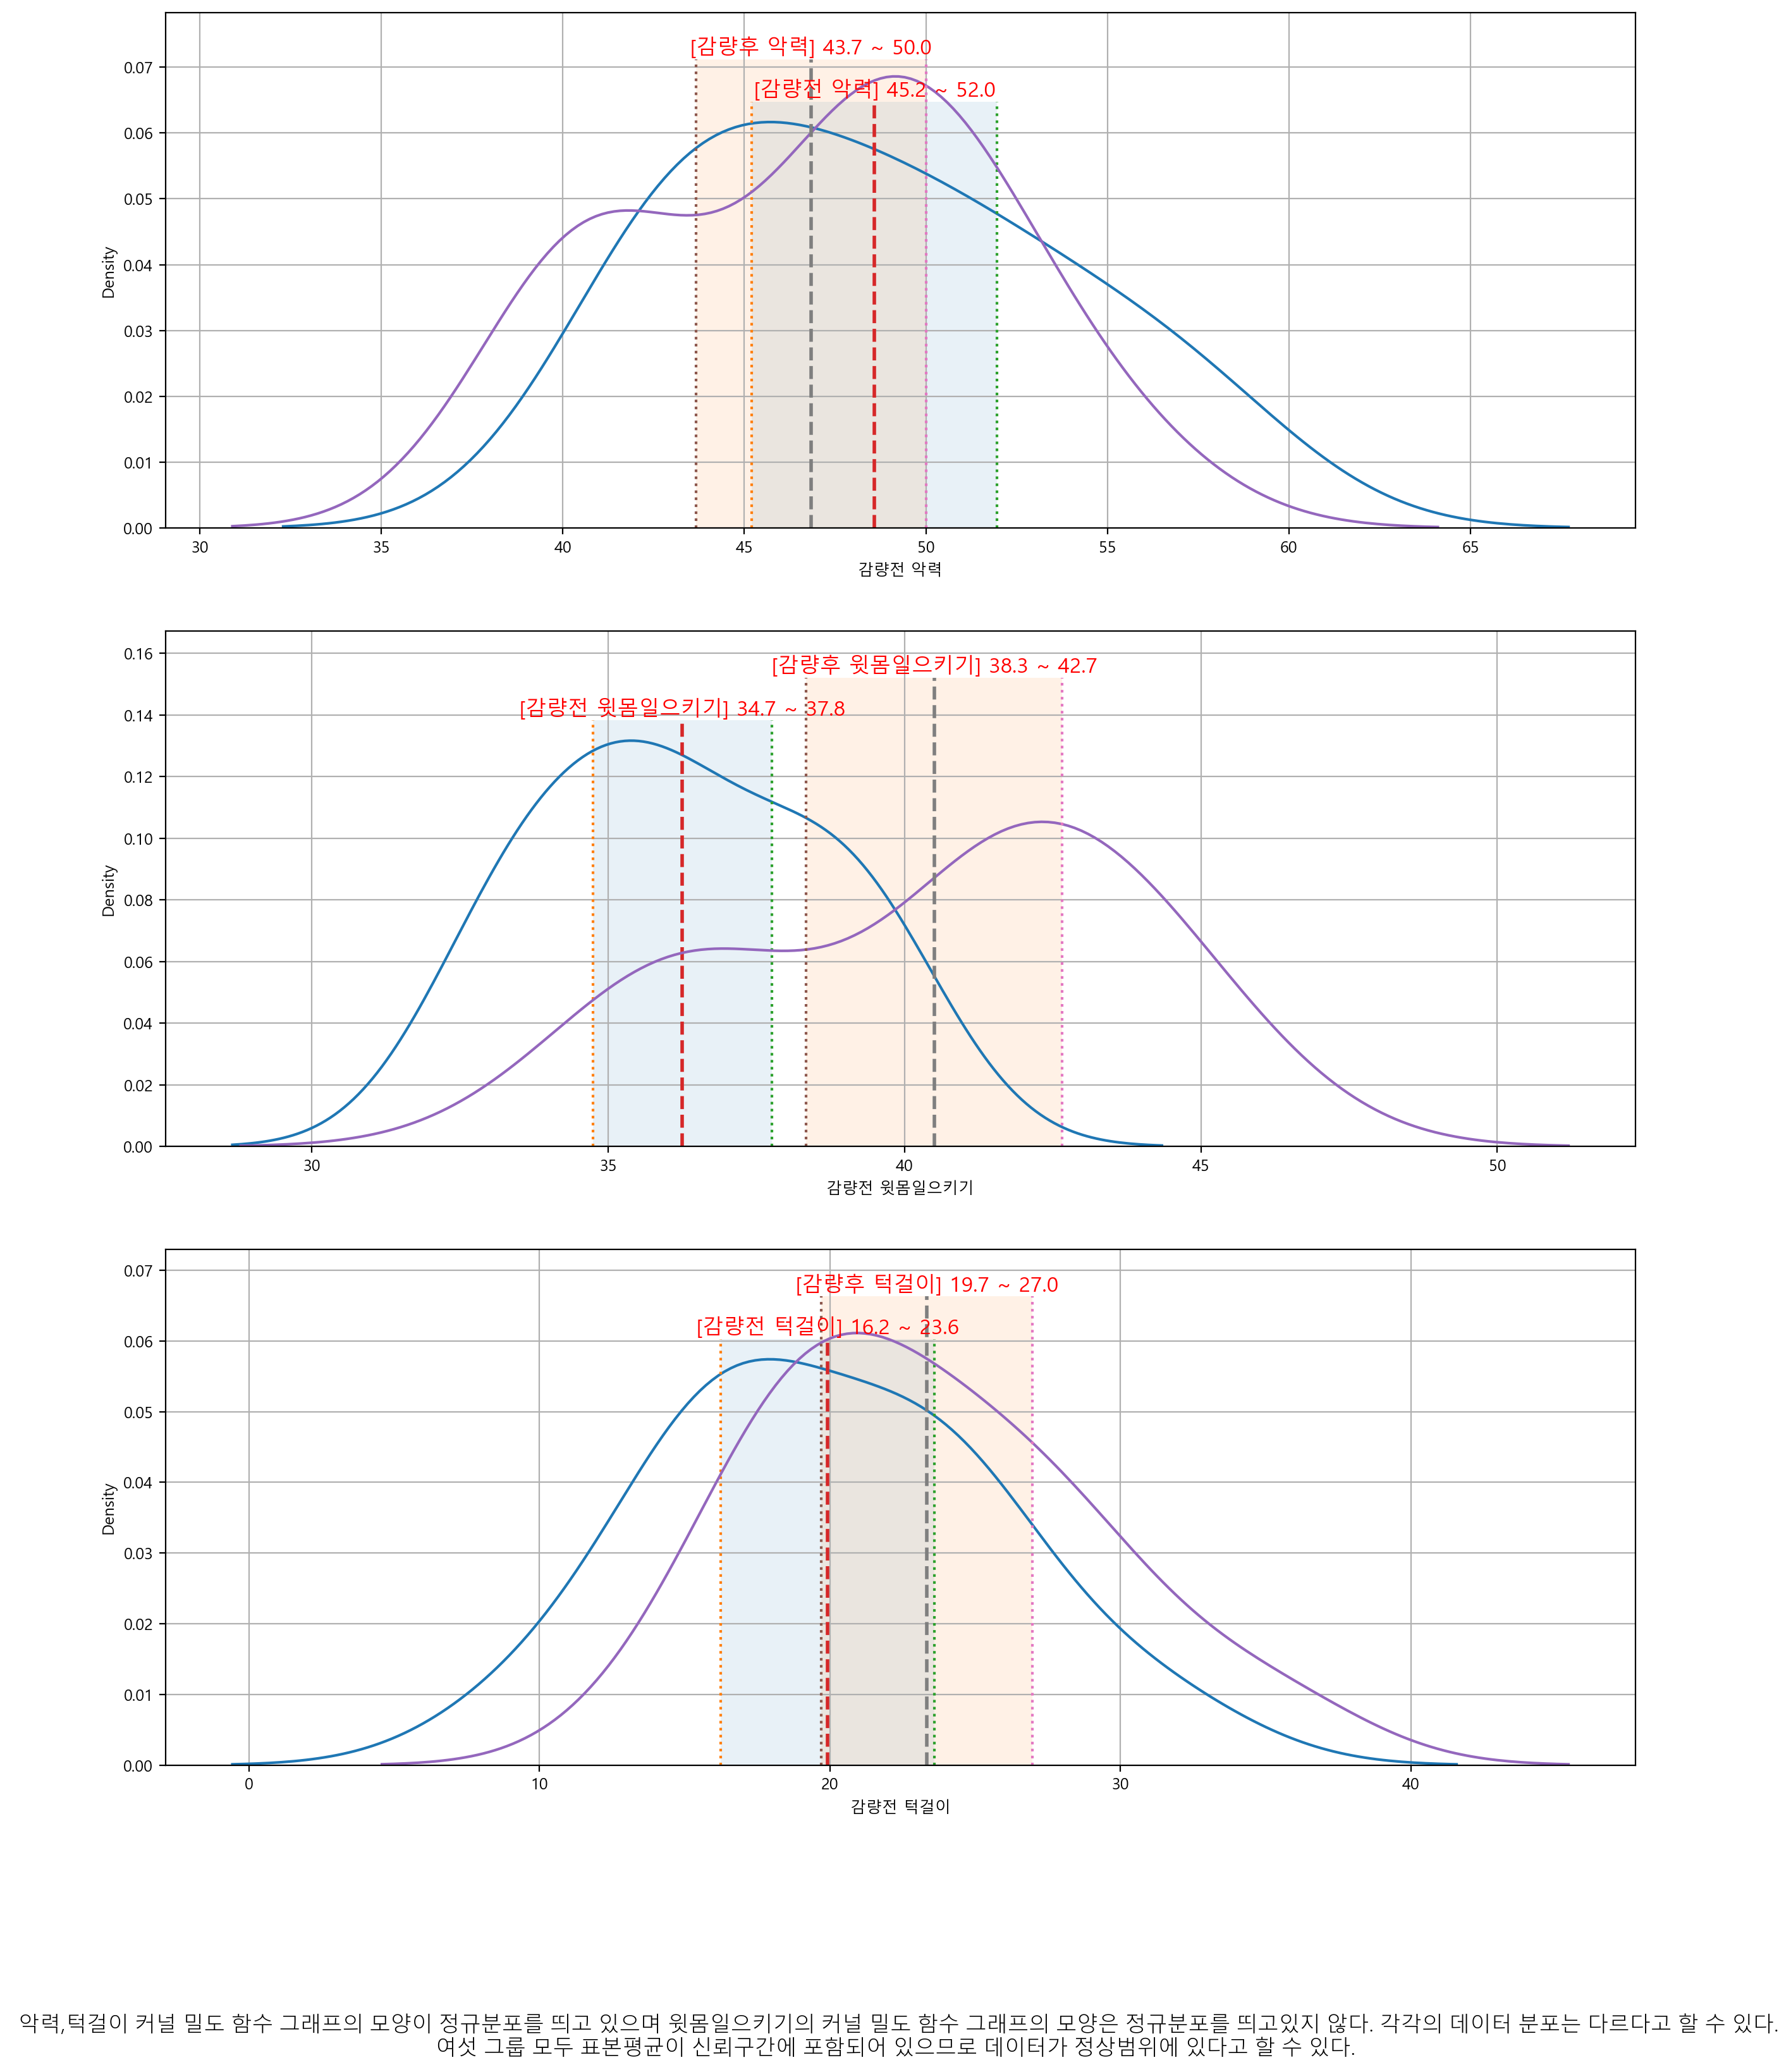

In [32]:
fig, axes = plt.subplots(3,1,figsize=(15,18))

for num,c in enumerate(df5.columns):
    #print(c)
    
    data = df5[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data, ax = axes[(num)//2])

    xmin, xmax, ymin, ymax = axes[(num)//2].axis()

    # 신뢰구간 그리기
    axes[(num)//2].plot([cmin, cmin], [0, ymax], linestyle=':' )
    axes[(num)//2].plot([cmax, cmax], [0, ymax], linestyle=':')
    axes[(num)//2].fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    axes[(num)//2].plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    axes[(num)//2].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    axes[(num)//2].set_ylim(0, ymax*1.1)

for i in range(3):
    axes[i].grid()

txt = """ 악력,턱걸이 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며 윗몸일으키기의 커널 밀도 함수 그래프의 모양은 정규분포를 띄고있지 않다. 각각의 데이터 분포는 다르다고 할 수 있다.
여섯 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [33]:
for c in df5.columns:
    s, p = normaltest(df5[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[감량전 악력] statistic: 1.146, p-value: 0.564, 정규성 충족 여부: True
[감량후 악력] statistic: 1.358, p-value: 0.507, 정규성 충족 여부: True
[감량전 윗몸일으키기] statistic: 1.363, p-value: 0.506, 정규성 충족 여부: True
[감량후 윗몸일으키기] statistic: 2.008, p-value: 0.366, 정규성 충족 여부: True
[감량전 턱걸이] statistic: 0.154, p-value: 0.926, 정규성 충족 여부: True
[감량후 턱걸이] statistic: 1.021, p-value: 0.600, 정규성 충족 여부: True


> `p-value`가 모두 0.05보다 크므로 모두 정규성을 충족한다.


#### (2) 등분산성

In [34]:
normal_dist = True      # 정규성 만족 여부
data = df5.copy()    # 원본 데이터 복사

for i in range(3):
    fields = list(map(lambda x: data[x], data.columns))
    fields = fields[i*2:(i+1)*2]
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*fields)
    else:
        n = "Levene"
        s, p = levene(*fields)
        
    print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Bartlett 검정: statistic: 0.043, p-value: 0.836, 등분산성 충족 여부: True
Bartlett 검정: statistic: 1.310, p-value: 0.252, 등분산성 충족 여부: True
Bartlett 검정: statistic: 0.002, p-value: 0.964, 등분산성 충족 여부: True


> `p-value`가 모두 0.05보다 크므로 모두 등분산성을 충족한다.


### [4] 체중감량 전후 비교

#### (1) 유의미한 차이가 있는지 확인

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 체중감량전 악력 측정 결과 | $\mu(감량전 악력)$ | |
| 체중감량후 악력 측정 결과 | $\mu(감량후 악력)$ | |
| 체중감량전 윗몸일으키기 측정 결과 | $\mu(감량전 윗몸일으키기)$ | |
| 체중감량후 윗몸일으키기 측정 결과 | $\mu(감량후 윗몸일으키기)$ | |
| 체중감량전 턱걸이 측정 결과 | $\mu(감량전 턱걸이)$ | |
| 체중감량후 턱걸이 측정 결과 | $\mu(감량후 턱걸이)$ | |
| 귀무가설($H_0$ _악력) | $\mu(감량전 악력) = \mu(감량후 악력)$ | 체중감량 전과 후 악력에는 차이가 없다 |
| 대립가설($H_1$ _악력) | $\mu(감량전 악력) \neq \mu(감량후 악력)$ | 체중감량 전과 후 악력에는 차이가 있다 |
| 귀무가설($H_0$ _윗몸일으키기) | $\mu(감량전 윗몸일으키기) = \mu(감량후 윗몸일으키기)$ | 체중감량 전과 후 윗몸일으키기 갯수에는 차이가 없다 |
| 대립가설($H_1$ _윗몸일으키기) | $\mu(감량전 윗몸일으키기) \neq \mu(감량후 윗몸일으키기)$ | 체중감량 전과 후 윗몸일으키기 갯수에는 차이가 있다 |
| 귀무가설($H_0$ _턱걸이) | $\mu(감량전 턱걸이) = \mu(감량후 턱걸이)$ | 체중감량 전과 후 턱걸이 갯수에는 차이가 없다 |
| 대립가설($H_1$ _턱걸이) | $\mu(감량전 턱걸이) \neq \mu(감량후 턱걸이)$ | 체중감량 전과 후 턱걸이 갯수에는 차이가 있다 |

In [35]:
전 = ['감량전 악력','감량전 윗몸일으키기','감량전 턱걸이']
후 = ['감량후 악력','감량후 윗몸일으키기','감량후 턱걸이']
종목 = ['악력','윗몸일으키기','턱걸이']
for i in range(3):
    s, p = ttest_rel(df5[전[i]], df5[후[i]], alternative='two-sided')
    print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무"))

statistic: 2.365, p-value: 0.037, 대립가설 채택
statistic: -7.180, p-value: 0.000, 대립가설 채택
statistic: -6.842, p-value: 0.000, 대립가설 채택


> `p-value`가 셋 모두 `0.05`보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 체중감량전과 후의 악력, 윗몸일으키기, 턱걸이 실시에는 차이가 있다.

#### (2) 증감방향 확인

| 구분 | 수식 | 내용 |
|---|---|---|
| 귀무가설($H_0$ _악력) | $\mu(감량전 악력) = \mu(감량후 악력)$ | 체중감량 후 악력은 체중감량 전 악력보다 크지 않다 |
| 대립가설($H_1$ _악력) | $\mu(감량전 악력) \neq \mu(감량후 악력)$ | 체중감량 후 악력은 체중감량 전 악력보다 크다 |
| 귀무가설($H_0$ _윗몸일으키기) | $\mu(감량전 윗몸일으키기) = \mu(감량후 윗몸일으키기)$ | 체중감량 후 윗몸일으키기 갯수는 체중감량 전 윗몸일으키기 갯수보다 크지 않다 |
| 대립가설($H_1$ _윗몸일으키기) | $\mu(감량전 윗몸일으키기) \neq \mu(감량후 윗몸일으키기)$ | 체중감량 후 윗몸일으키기 갯수는 체중감량 전 윗몸일으키기 갯수보다 크다 |
| 귀무가설($H_0$ _턱걸이) | $\mu(감량전 턱걸이) = \mu(감량후 턱걸이)$ | 체중감량 후 턱걸이 갯수는 체중감량 전 턱걸이 갯수보다 크지 않다 |
| 대립가설($H_1$ _턱걸이) | $\mu(감량전 턱걸이) \neq \mu(감량후 턱걸이)$ | 체중감량 후 턱걸이 갯수는 체중감량 전 턱걸이 갯수보다 크다 |


In [36]:
for i in range(3):
    s, p = ttest_rel(df5[후[i]], df5[전[i]], alternative='greater')
    print("{0} || statistic: {1:.3f}, p-value: {2:.3f}, {3}가설 채택".format(종목[i],s, p, "대립" if p <= 0.05 else "귀무"))

악력 || statistic: -2.365, p-value: 0.981, 귀무가설 채택
윗몸일으키기 || statistic: 7.180, p-value: 0.000, 대립가설 채택
턱걸이 || statistic: 6.842, p-value: 0.000, 대립가설 채택


> `p-value`가 악력의 경우는 `0.981`로 귀무가설을 기각하지 못한다. 
>
> 윗몸일으키기와 턱걸이의 경우에는 `0.000`로 귀무가설을 기각하고 대립가설을 채택한다.
>
> 따라서, 체중감량후의 악력은 체중감량 전의 악력보다 크며, 체중감량후의 윗몸일으키기와 턱걸이는 체중감량전의 해당 운동의 횟수보다 작다.

### [5] 가설검정 시각화


#### (1) 데이터 전처리


In [37]:
df5

,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
이름,,,,,,
B.S,43,41,35,41,25,29
P.J,42,41,40,44,25,29
G.G,52,50,36,41,22,23
A.L,53,52,38,42,10,15
I.H,44,40,36,42,15,19
B.Y,46,47,39,44,17,19
I.K,48,47,35,42,24,26
K.B,58,55,34,36,17,18
K.J,50,50,33,35,17,20


In [38]:
melt5_1 = melt(df5[[전[0],후[0]]], var_name='group', value_name='value')
melt5_2 = melt(df5[[전[1],후[1]]], var_name='group', value_name='value')
melt5_3 = melt(df5[[전[2],후[2]]], var_name='group', value_name='value')
data5 = [melt5_1, melt5_2, melt5_3]

#### (2) 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00


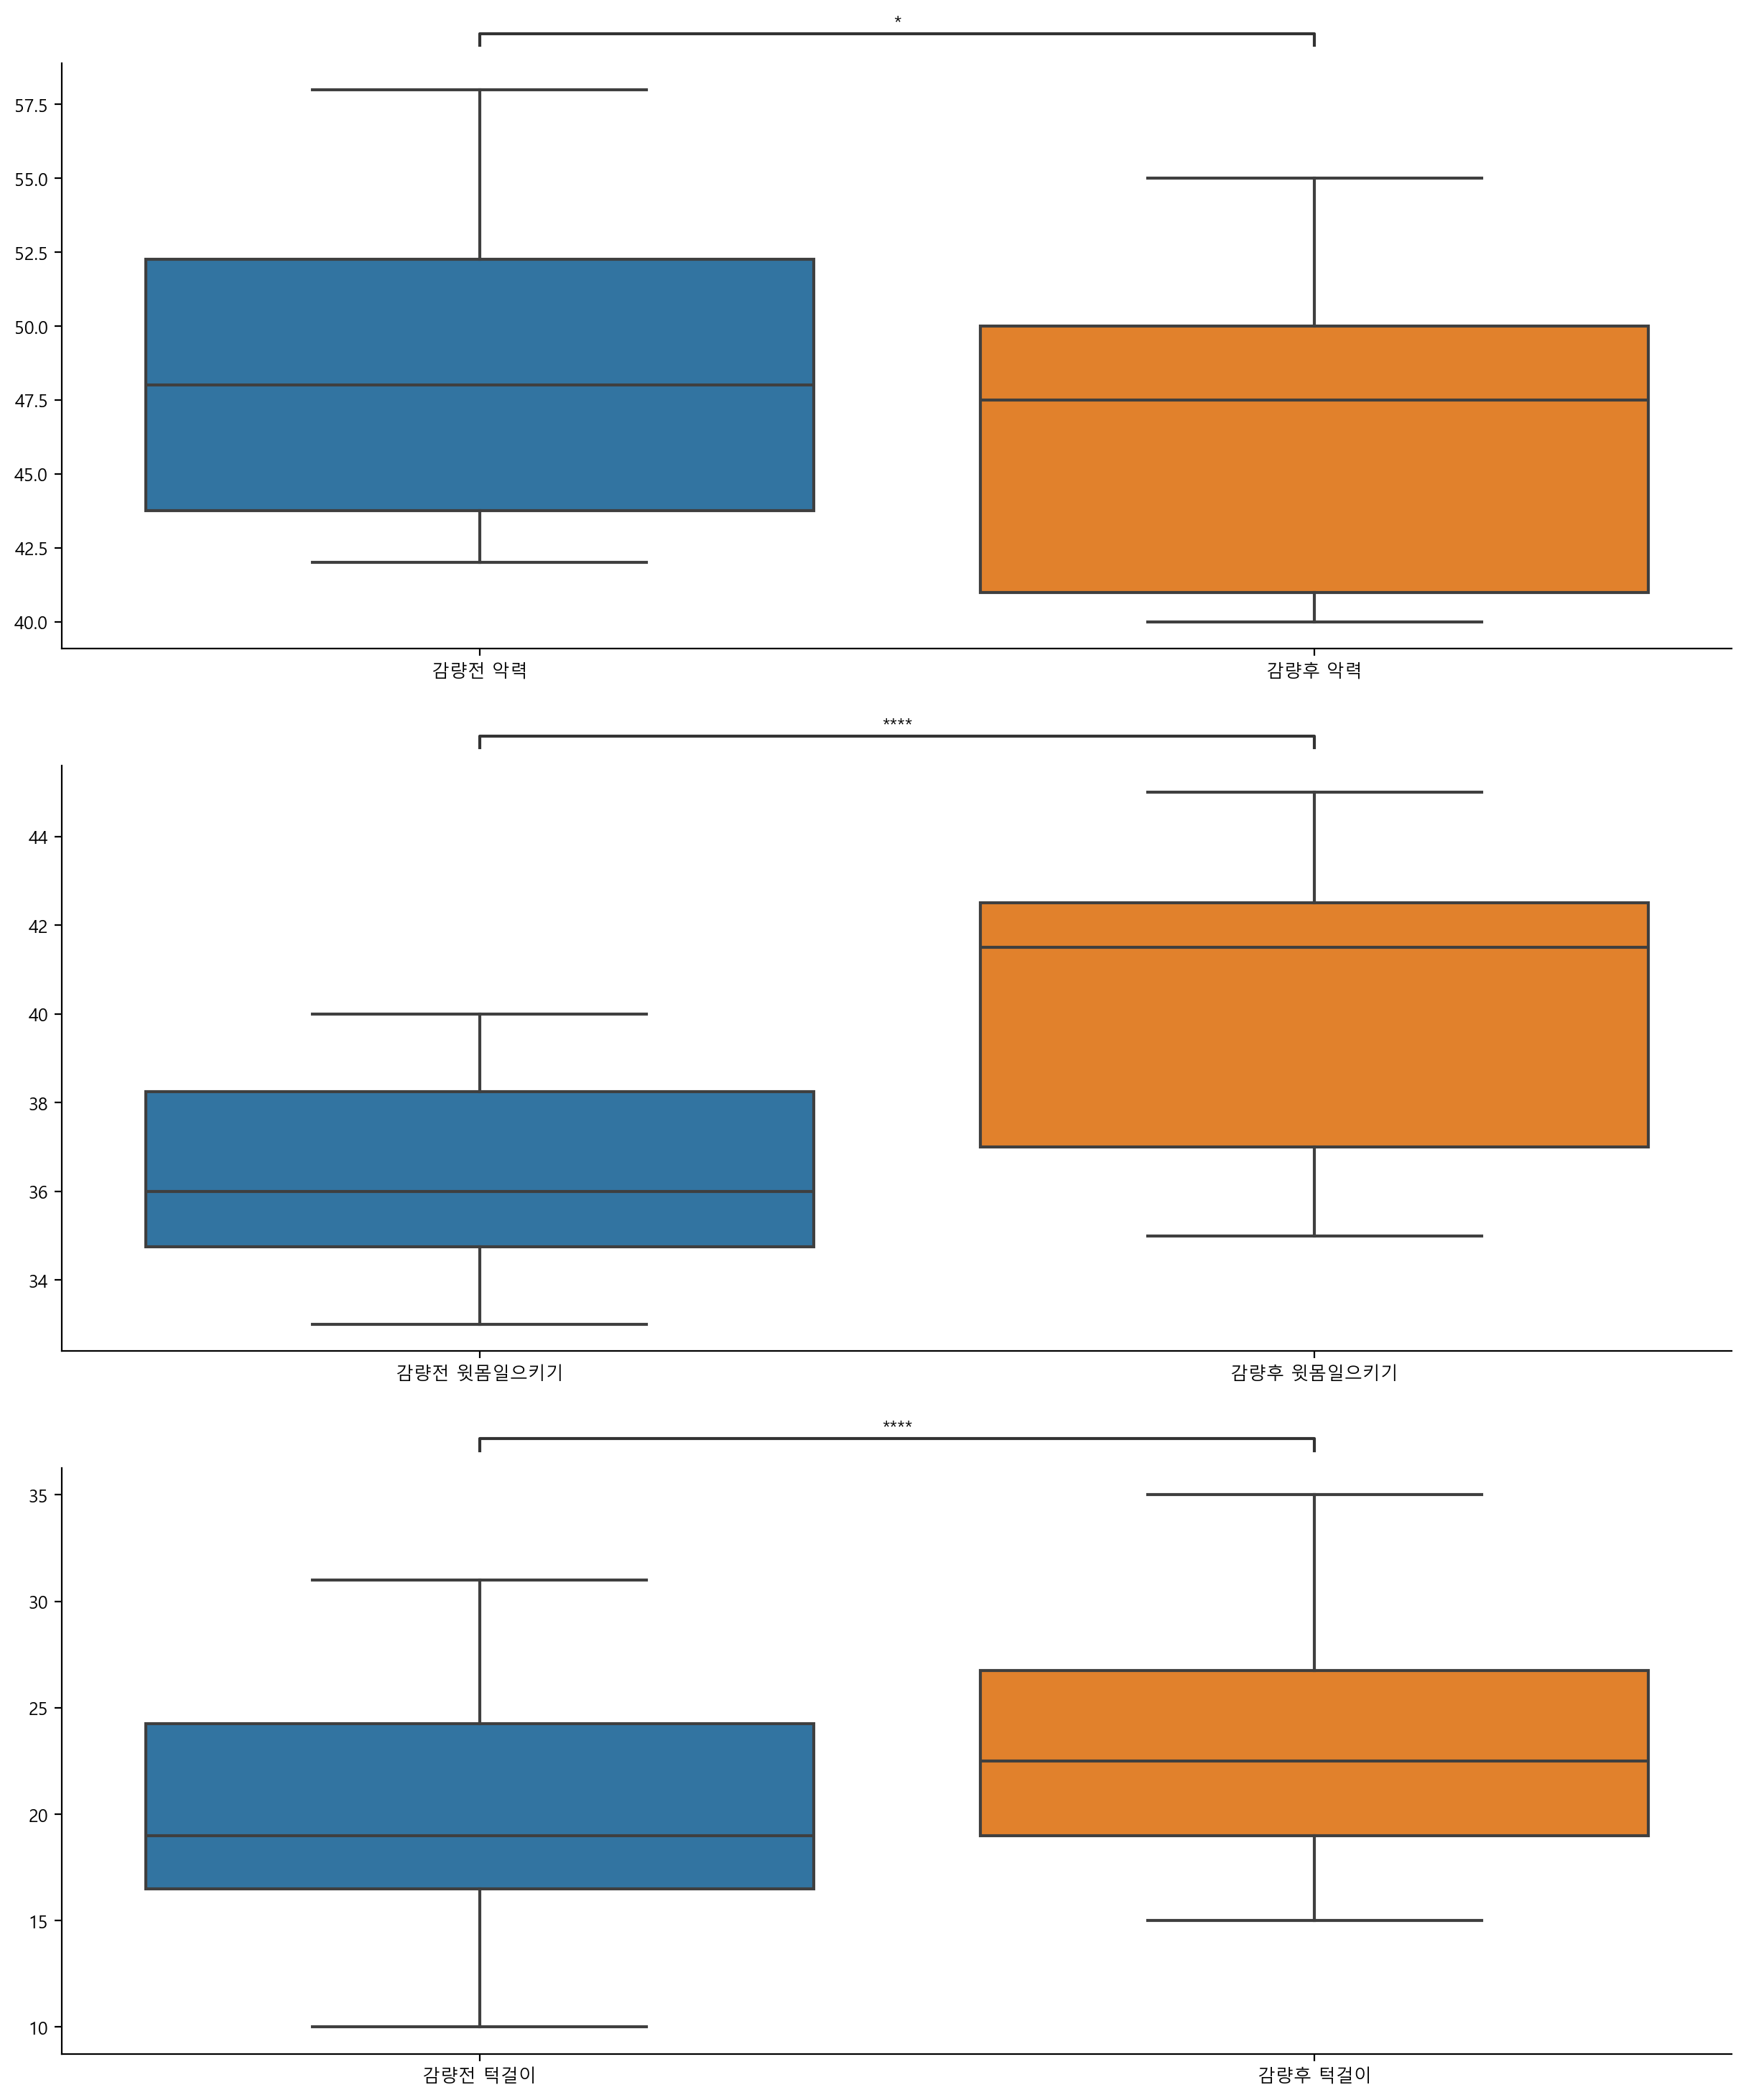

In [39]:
# 전 = ['감량전 악력','감량전 윗몸일으키기','감량전 턱걸이']
# 후 = ['감량후 악력','감량후 윗몸일으키기','감량후 턱걸이']

config = {
    "data": None,
    "x": "group",
    "y": "value",
    "pairs": None,
    "test": "t-test_paired", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}


fig, axes = plt.subplots(3,1,figsize=(15,18))
for i in range(3):
    config['data'] = data5[i]
    config["pairs"] = [(전[i],후[i])]
    ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'], ax = axes[i])


    annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
    annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
    annotator.apply_and_annotate()
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    sb.despine(ax=axes[i])
plt.show()
plt.close()

## 문제 6

서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.

주어진 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.

데이터를 상권별로 2023년 상반기(1,2분기)와 하반기(3,4분기)로 구분하여

하반기 매출이 상반기 매출액에 비해 어떻게 변화하였는지 확인하라.

| quarter | code    | type | name                   | sales_amount     | number_of_sales |
|---------|---------|------|------------------------|------------------|-----------------|
| 1       | 3001491 | 관광특구 | 이태원 관광특구               | 72,523,644,100   | 2,496,865       |
| 1       | 3001492 | 관광특구 | 명동 남대문 북창동 다동 무교동 관광특구 | 283,332,346,393  | 10,246,122      |
| 1       | 3001493 | 관광특구 | 동대문패션타운 관광특구           | 81,696,730,221   | 2,880,324       |
| 1       | 3001494 | 관광특구 | 종로·청계 관광특구             | 212,062,656,625  | 4,960,006       |
| 1       | 3001495 | 관광특구 | 잠실 관광특구                | 231,338,386,876  | 5,995,166       |
| 1       | 3001496 | 관광특구 | 강남 마이스 관광특구            | 214,898,892,413  | 4,862,653       |
| 1       | 3110001 | 골목상권 | 이북5도청사                 | 435,264,344      | 13,080          |
| 1       | 3110002 | 골목상권 | 독립문역 1번                | 4,062,721,649    | 339,647         |
| 1       | 3110003 | 골목상권 | 세검정초등학교                | 576,819,152      | 16,978          |
| 1       | 3110004 | 골목상권 | 대신고등학교                 | 312,840,339      | 7,706           |

> https://data.hossam.kr/mldata/commercial.xlsx

### [1] 데이터 가져오기

In [40]:
df6 = read_excel('https://data.hossam.kr/mldata/commercial.xlsx')
df6 #독립표본 T-Test

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


In [41]:
df6['number'] = (df6['quarter']+1) //2

df6_1 = df6[['type','number','name','sales_amount']]
df6_1

,type,number,name,sales_amount
0,관광특구,1,이태원 관광특구,72523644100
1,관광특구,1,명동 남대문 북창동 다동 무교동 관광특구,283332346393
2,관광특구,1,동대문패션타운 관광특구,81696730221
3,관광특구,1,종로·청계 관광특구,212062656625
4,관광특구,1,잠실 관광특구,231338386876
...,...,...,...,...
6217,전통시장,2,둔촌역전통시장,13523478306
6218,전통시장,2,길동복조리시장,6236556030
6219,전통시장,2,명일전통시장,3973269286
6220,전통시장,2,고덕 골목형상점가,15013907999


In [42]:
df6_2 = pivot_table(df6_1,index ='name',columns= ['type','number'],values='sales_amount')
df6_2

type                   골목상권               관광특구              발달상권  \
number                    1             2    1   2             1   
name                                                               
4.19민주묘지역 2번   2.102977e+09  2.332107e+09  NaN NaN           NaN   
63빌딩                    NaN           NaN  NaN NaN  2.339251e+09   
DMC(디지털미디어시티)           NaN           NaN  NaN NaN  4.970714e+10   
GS강동자이아파트      2.680402e+09  2.788107e+09  NaN NaN           NaN   
G타워            2.134879e+09  2.190241e+09  NaN NaN           NaN   
...                     ...           ...  ...  ..           ...   
후암동주민센터        7.629614e+09  8.067192e+09  NaN NaN           NaN   
후암시장                    NaN           NaN  NaN NaN           NaN   
휘문고교사거리                 NaN           NaN  NaN NaN  2.900900e+10   
흑리단길           5.935444e+09  6.535324e+09  NaN NaN           NaN   
흑석시장                    NaN           NaN  NaN NaN           NaN   

type                                 전통시장                
number                    2             1             2  
name                                                     
4.19민주묘지역 2번            NaN           NaN           NaN  
63빌딩           2.997143e+09           NaN           NaN  
DMC(디지털미디어시티)  5.704299e+10           NaN           NaN  
GS강동자이아파트               NaN           NaN           NaN  
G타워                     NaN           NaN           NaN  
...                     ...           ...           ...  
후암동주민센터                 NaN           NaN           NaN  
후암시장                    NaN  3.854804e+09  4.785912e+09  
휘문고교사거리        4.351534e+10           NaN           NaN  
흑리단길                    NaN           NaN           NaN  
흑석시장                    NaN  1.986584e+08  2.324532e+08  

[1564 rows x 8 columns]

In [141]:
df6_2.describe()


type            골목상권                        관광특구                        발달상권  \
number             1             2             1             2             1   
count   1.026000e+03  1.027000e+03  6.000000e+00  6.000000e+00  2.490000e+02   
mean    3.454377e+09  3.841864e+09  2.028075e+11  2.534789e+11  5.409940e+10   
std     4.561404e+09  5.032951e+09  9.342591e+10  1.324731e+11  1.004082e+11   
min     1.387990e+05  6.662400e+04  9.219003e+10  9.950374e+10  1.279542e+08   
25%     6.628251e+08  7.563307e+08  1.234769e+11  1.434910e+11  1.550349e+10   
50%     1.817870e+09  2.100286e+09  2.260416e+11  2.516427e+11  2.918548e+10   
75%     4.594296e+09  5.007248e+09  2.477885e+11  3.596002e+11  5.770685e+10   
max     4.469729e+10  4.517074e+10  3.282455e+11  4.150578e+11  9.164814e+11   

type                          전통시장                
number             2             1             2  
count   2.490000e+02  2.780000e+02  2.780000e+02  
mean    6.002680e+10  9.900784e+09  1.121066e+10  
std     1.058239e+11  1.878831e+10  2.087202e+10  
min     1.336879e+08  8.575262e+06  5.704258e+06  
25%     1.732054e+10  9.975312e+08  1.020702e+09  
50%     3.254917e+10  4.522809e+09  4.894634e+09  
75%     6.387790e+10  1.195133e+10  1.342504e+10  
max     9.035427e+11  1.857243e+11  1.994628e+11

### [2] 신뢰구간 확인


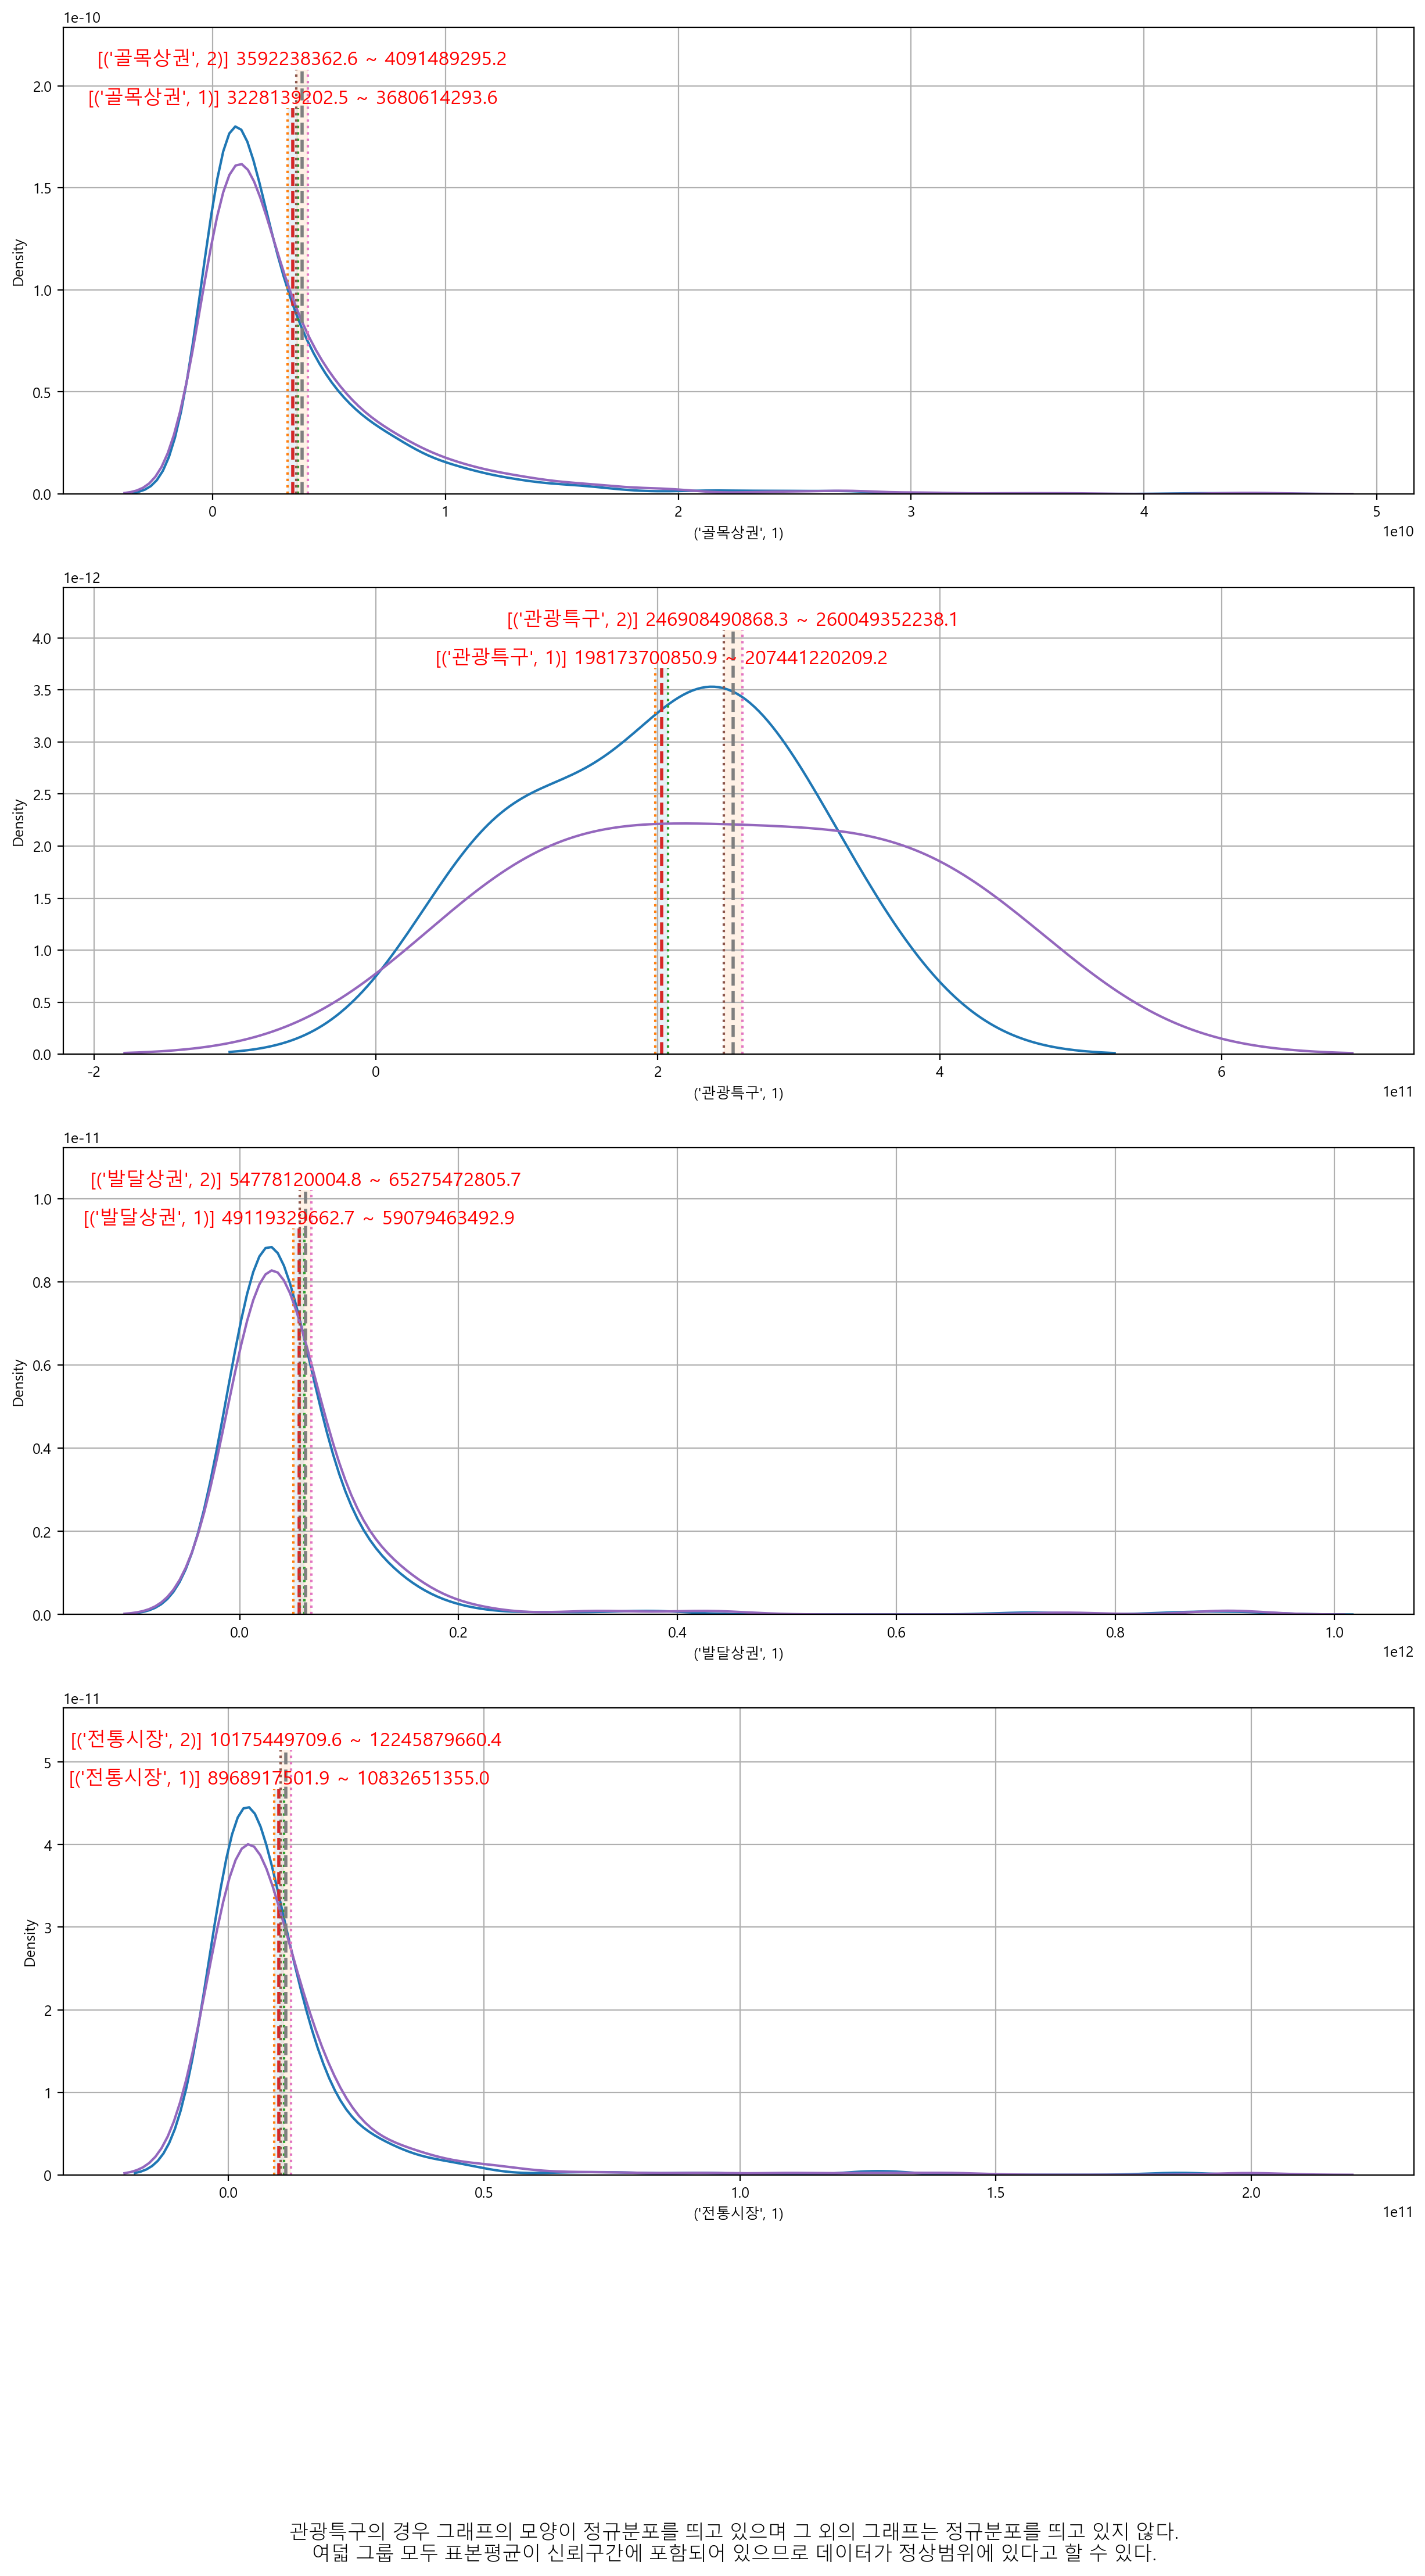

In [110]:
fig, axes = plt.subplots(4,1,figsize=(15,24))

for num,c in enumerate(df6_2.columns):
    #print(c)
    
    data = df6_2[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data, ax = axes[(num)//2])

    xmin, xmax, ymin, ymax = axes[(num)//2].axis()

    # 신뢰구간 그리기
    axes[(num)//2].plot([cmin, cmin], [0, ymax], linestyle=':' )
    axes[(num)//2].plot([cmax, cmax], [0, ymax], linestyle=':')
    axes[(num)//2].fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    axes[(num)//2].plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    axes[(num)//2].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    axes[(num)//2].set_ylim(0, ymax*1.1)

for i in range(4):
    axes[i].grid()

txt = """ 

관광특구의 경우 그래프의 모양이 정규분포를 띄고 있으며 그 외의 그래프는 정규분포를 띄고 있지 않다.
여덟 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [136]:
for c in df6_2.columns:
    try:
        s, p = normaltest(df6_2[c].dropna())
        print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))
    except:pass


[('골목상권', 1)] statistic: 763.784, p-value: 0.000, 정규성 충족 여부: False
[('골목상권', 2)] statistic: 740.881, p-value: 0.000, 정규성 충족 여부: False
[('발달상권', 1)] statistic: 334.805, p-value: 0.000, 정규성 충족 여부: False
[('발달상권', 2)] statistic: 315.548, p-value: 0.000, 정규성 충족 여부: False
[('전통시장', 1)] statistic: 337.639, p-value: 0.000, 정규성 충족 여부: False
[('전통시장', 2)] statistic: 319.680, p-value: 0.000, 정규성 충족 여부: False


> 관광특구의 경우 데이터의 수가 6개로 정규성 여부를 확인하지 못한다.
>
> 그외의 경우 `p-value`가 모두 `0.000`으로 정규성을 충족하지 못한다.


In [46]:
df6_3 = df6_2.drop('관광특구',axis=1)
df6_3 

type                   골목상권                        발달상권                \
number                    1             2             1             2   
name                                                                    
4.19민주묘지역 2번   2.102977e+09  2.332107e+09           NaN           NaN   
63빌딩                    NaN           NaN  2.339251e+09  2.997143e+09   
DMC(디지털미디어시티)           NaN           NaN  4.970714e+10  5.704299e+10   
GS강동자이아파트      2.680402e+09  2.788107e+09           NaN           NaN   
G타워            2.134879e+09  2.190241e+09           NaN           NaN   
...                     ...           ...           ...           ...   
후암동주민센터        7.629614e+09  8.067192e+09           NaN           NaN   
후암시장                    NaN           NaN           NaN           NaN   
휘문고교사거리                 NaN           NaN  2.900900e+10  4.351534e+10   
흑리단길           5.935444e+09  6.535324e+09           NaN           NaN   
흑석시장                    NaN           NaN           NaN           NaN   

type                   전통시장                
number                    1             2  
name                                       
4.19민주묘지역 2번            NaN           NaN  
63빌딩                    NaN           NaN  
DMC(디지털미디어시티)           NaN           NaN  
GS강동자이아파트               NaN           NaN  
G타워                     NaN           NaN  
...                     ...           ...  
후암동주민센터                 NaN           NaN  
후암시장           3.854804e+09  4.785912e+09  
휘문고교사거리                 NaN           NaN  
흑리단길                    NaN           NaN  
흑석시장           1.986584e+08  2.324532e+08  

[1564 rows x 6 columns]

In [47]:
df6_3.describe()

type            골목상권                        발달상권                        전통시장  \
number             1             2             1             2             1   
count   1.026000e+03  1.027000e+03  2.490000e+02  2.490000e+02  2.780000e+02   
mean    3.454377e+09  3.841864e+09  5.409940e+10  6.002680e+10  9.900784e+09   
std     4.561404e+09  5.032951e+09  1.004082e+11  1.058239e+11  1.878831e+10   
min     1.387990e+05  6.662400e+04  1.279542e+08  1.336879e+08  8.575262e+06   
25%     6.628251e+08  7.563307e+08  1.550349e+10  1.732054e+10  9.975312e+08   
50%     1.817870e+09  2.100286e+09  2.918548e+10  3.254917e+10  4.522809e+09   
75%     4.594296e+09  5.007248e+09  5.770685e+10  6.387790e+10  1.195133e+10   
max     4.469729e+10  4.517074e+10  9.164814e+11  9.035427e+11  1.857243e+11   

type                  
number             2  
count   2.780000e+02  
mean    1.121066e+10  
std     2.087202e+10  
min     5.704258e+06  
25%     1.020702e+09  
50%     4.894634e+09  
75%     1.342504e+10  
max     1.994628e+11

#### (2) 등분산성

In [48]:
normal_dist = [False,False,False]      # 정규성 만족 여부
data = df6_3.copy()    # 원본 데이터 복사

for i in range(3):
    fields = list(map(lambda x: data[x].dropna(), data.columns))
    fields = fields[i*2:(i+1)*2]
    if normal_dist[i]:
        n = "Bartlett"
        s, p = bartlett(*fields)
    else:
        n = "Levene"
        s, p = levene(*fields)
        
    print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 2.249, p-value: 0.134, 등분산성 충족 여부: True
Levene 검정: statistic: 0.213, p-value: 0.644, 등분산성 충족 여부: True
Levene 검정: statistic: 0.502, p-value: 0.479, 등분산성 충족 여부: True


> `p-value`가 모두 0.05보다 크므로 모두 등분산성을 충족한다.


### [4] 상/하반기 비교

#### 유의미한 차이가 있는지 확인

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 골목상권 상반기 매출액 | $\mu(골목상권 상반기 매출액)$ | |
| 골목상권 하반기 매출액 | $\mu(골목상권 하반기 매출액)$ | |
| 발달상권 상반기 매출액 | $\mu(발달상권 상반기 매출액)$ | |
| 발달상권 하반기 매출액 | $\mu(발달상권 하반기 매출액)$ | |
| 전통시장 상반기 매출액 | $\mu(전통시장 상반기 매출액)$ | |
| 전통시장 하반기 매출액 | $\mu(전통시장 하반기 매출액)$ | |
| 귀무가설($H_0$ _골목상권) | $\mu(골목상권 상반기 매출액) = \mu(골목상권 하반기 매출액)$ | 골목상권 상반기와 하반기의 매출액 차이가 없다 |
| 대립가설($H_1$ _골목상권) | $\mu(골목상권 상반기 매출액) \neq \mu(골목상권 하반기 매출액)$ | 골목상권 상반기와 하반기의 매출액 차이가 있다 |
| 귀무가설($H_0$ _발달상권) | $\mu(발달상권 상반기 매출액) = \mu(발달상권 하반기 매출액)$ | 발달상권 상반기와 하반기의 매출액 차이가 없다 |
| 대립가설($H_1$ _발달상권) | $\mu(발달상권 상반기 매출액) \neq \mu(발달상권 하반기 매출액)$ | 발달상권 상반기와 하반기의 매출액 차이가 있다 |
| 귀무가설($H_0$ _전통시장) | $\mu(전통시장 상반기 매출액) = \mu(전통시장 하반기 매출액)$ | 전통시장 상반기와 하반기의 매출액 차이가 없다 |
| 대립가설($H_1$ _전통시장) | $\mu(전통시장 상반기 매출액) \neq \mu(전통시장 하반기 매출액이)$ | 전통시장 상반기와 하반기의 매출액 차이가 있다 |

In [104]:
종목_6 = ['골목상권','발달상권','전통시장']
전_6 = [('골목상권', 1),('발달상권', 1),('전통시장', 1)]
후_6 = [('골목상권', 2),('발달상권', 2),('전통시장', 2)]

In [105]:
for i in range(3):
    s, p = ttest_ind(df6_3[전_6[i]].dropna(), df6_3[후_6[i]].dropna(), alternative='two-sided')
    print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무"))

statistic: -1.828, p-value: 0.068, 귀무가설 채택
statistic: -0.641, p-value: 0.522, 귀무가설 채택
statistic: -0.778, p-value: 0.437, 귀무가설 채택


`p-value`가 0.05보다 크므로 귀무가설을 기각할 수 없다. 따라서 전 상권이 상반기와 하반기의 매출액 차이가 없다.

### [5] 가설검정 시각화

#### (1) 데이터 전처리

In [97]:
melt6 = melt(df6_3,).dropna()
melt6.query('type == "골목상권"')
melt6['type'].unique()

array(['골목상권', '발달상권', '전통시장'], dtype=object)

In [98]:
종목6 = []
종목6.append(melt6.query('type =="골목상권"').drop('type',axis=1))
종목6.append(melt6.query('type =="발달상권"').drop('type',axis=1))
종목6.append(melt6.query('type =="전통시장"').drop('type',axis=1))

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: t-test independent samples, P_val:6.774e-02 t=-1.828e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: t-test independent samples, P_val:5.217e-01 t=-6.412e-01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: t-test independent samples, P_val:4.371e-01 t=-7.777e-01


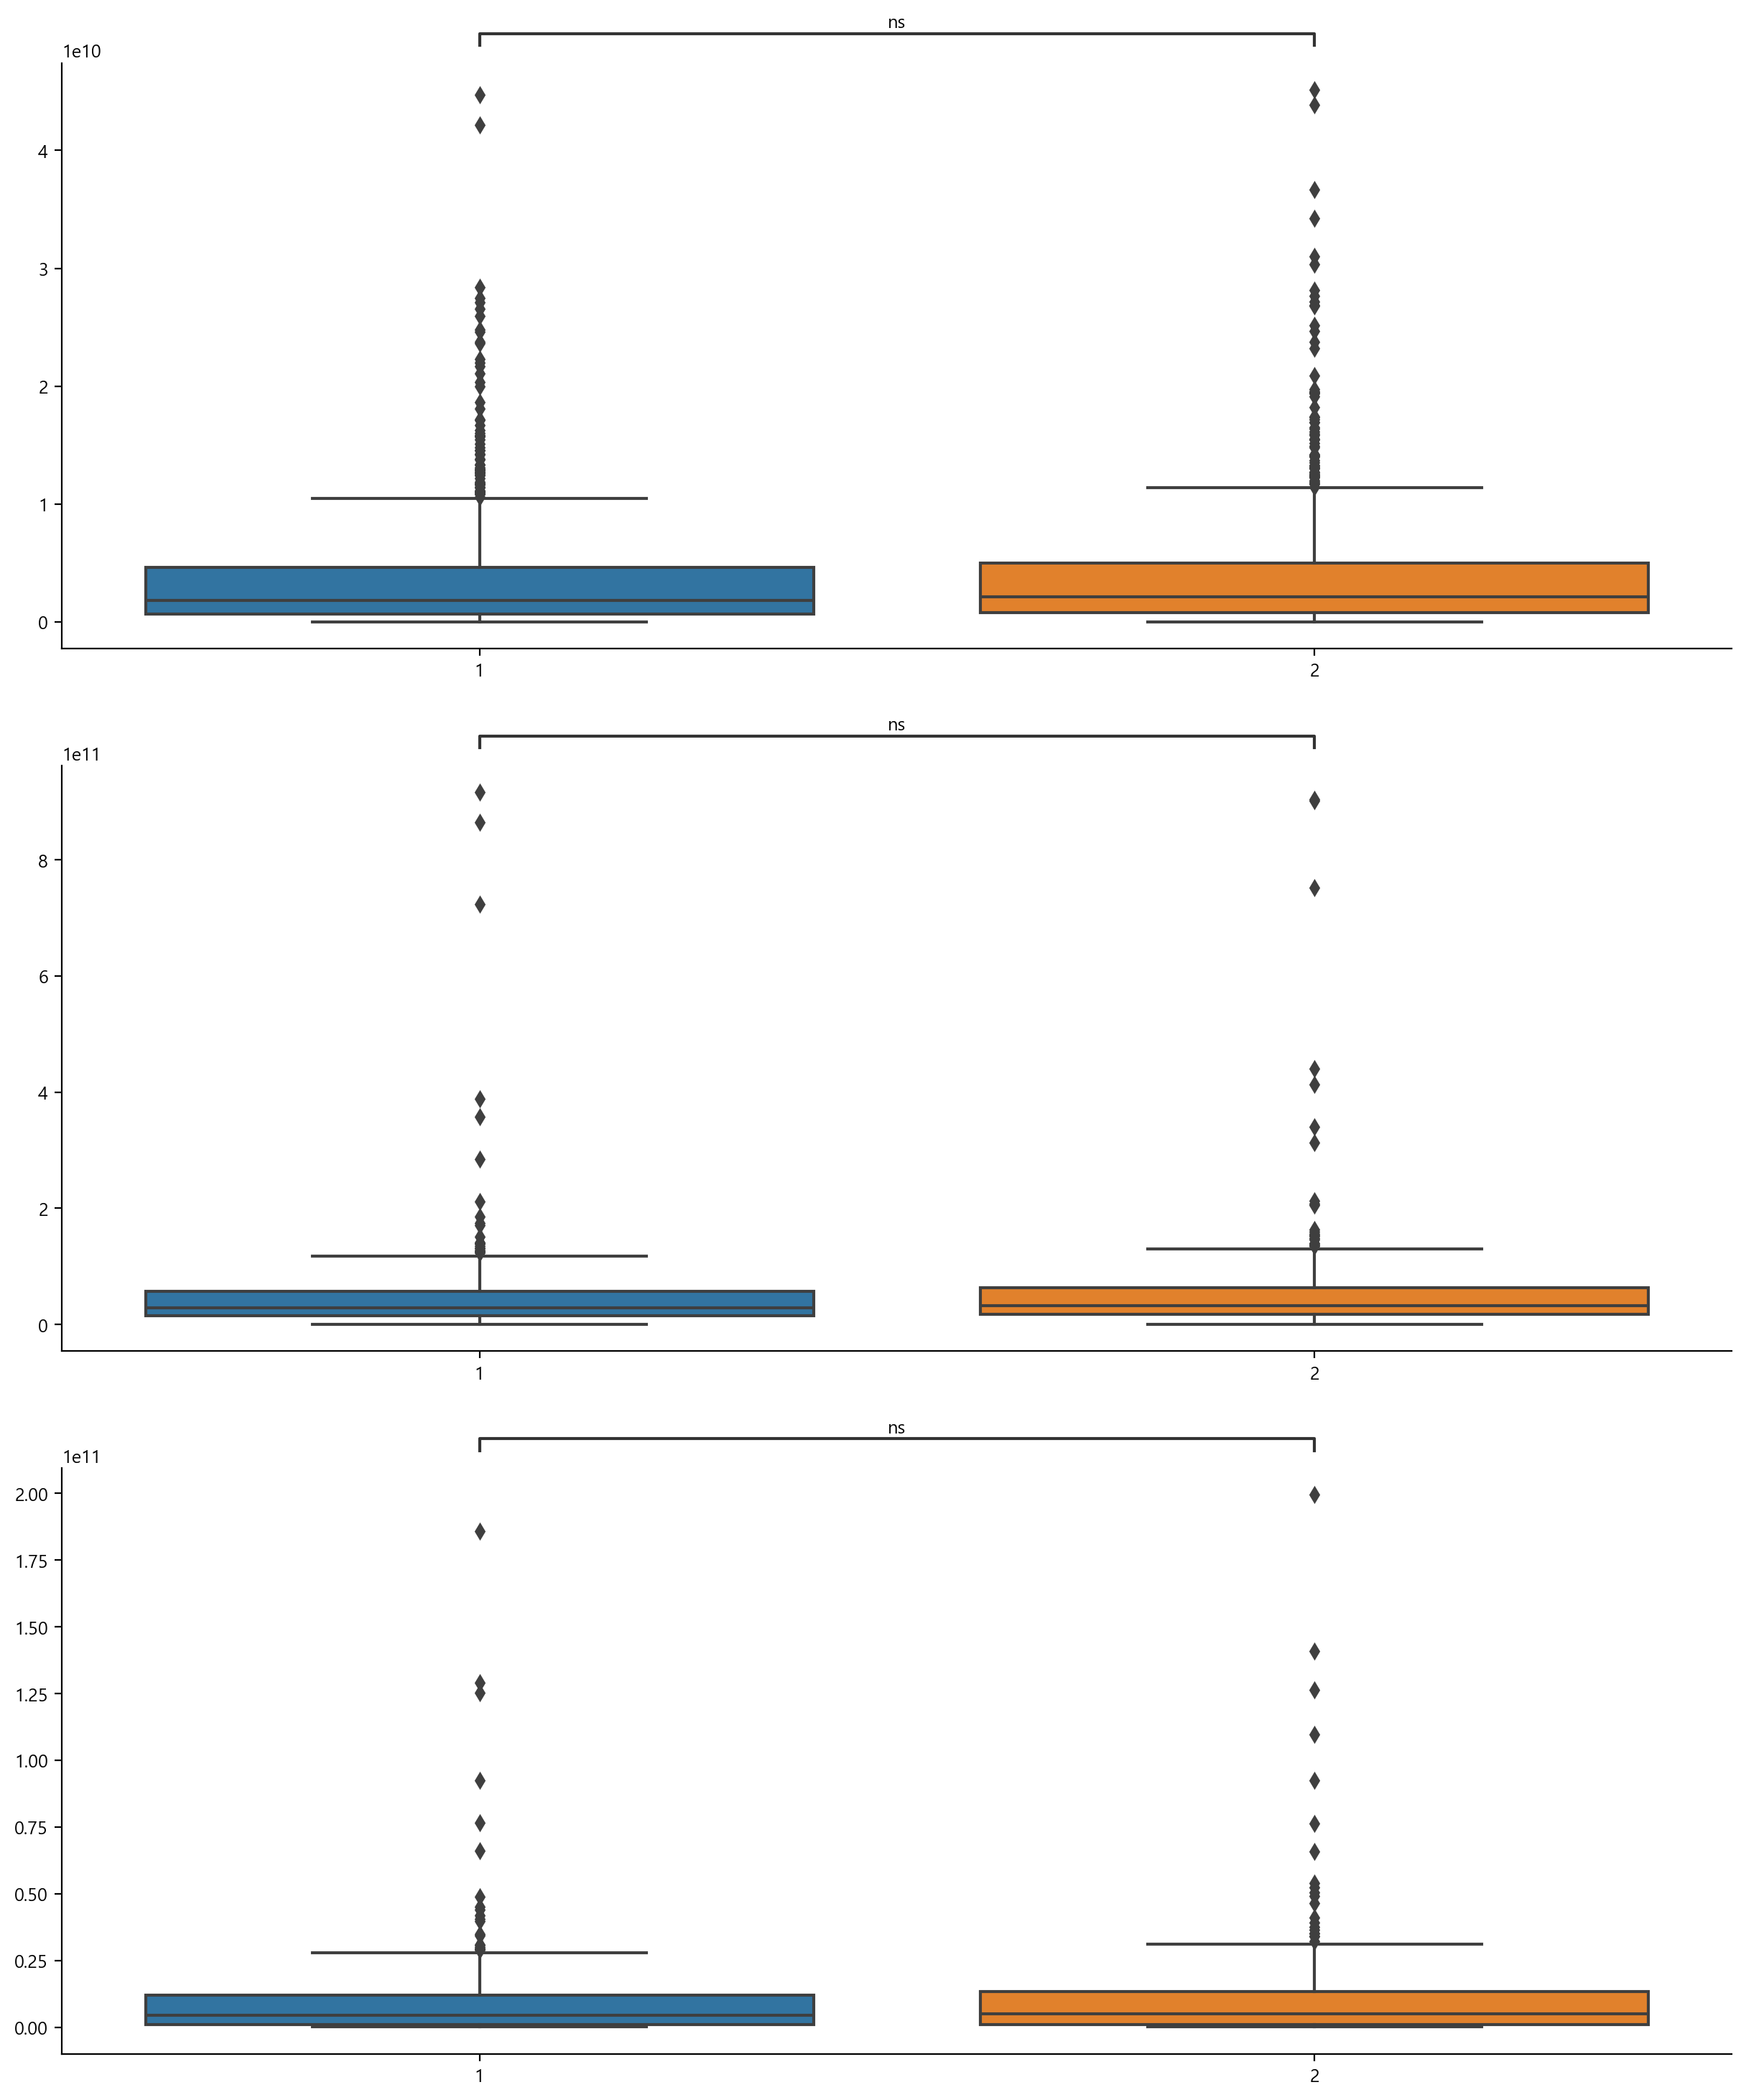

In [102]:
fig, axes = plt.subplots(3,1,figsize=(15,18))
for i in range(3):
    data_6 = 종목6[i]
    ax = sb.boxplot(data=data_6, x='number', y='value',ax = axes[i])

    annotator = Annotator(ax, data=data_6, x='number', y='value', pairs=[(1, 2)])
    annotator.configure(test='t-test_ind', text_format='star', loc='outside')
    #  text_format = 'star', 'simple'
    annotator.apply_and_annotate()
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    sb.despine(ax=axes[i])
plt.show()
plt.close()


### [6] 결론

서울시의 2023년 상권에 따른 반기별 매출액의 변화는 다음과 같다.

* 관광특구의 경우 데이터 수량의 부족으로 다루지 않는다.
* 나머지의 경우 신뢰수준 0.95에서 상반기와 하반기의 매출액의 차이는 보이지 않는다.



<!-- 개수가 맞지 않으면 독립표본으로 해결해야한다. -->

## 문제 7

다음의 데이터는 `Cookie Cats`라는 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 표 일부이다.

개편 이전 버전을 `A`로 표시하고 개편 후 버전을 `B`로 표시하였다.

게임의 개편이 유저들의 플레이 시간에 어떤 영향을 주었는지 분석하라.

| userid | version | sum_gamerounds |
|--------|---------|----------------|
| 116    | A       | 3              |
| 337    | A       | 38             |
| 377    | B       | 165            |
| 483    | B       | 1              |
| 488    | B       | 179            |

> https://data.hossam.kr/mldata/cookie_cats.xlsx

### [1] 데이터 가져오기

In [52]:
df7 = read_excel('https://data.hossam.kr/mldata/cookie_cats.xlsx')
df7 #독립표본 T-Test

,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


In [53]:
df7_2 = pivot_table(df7, index = 'userid', columns = 'version', values='sum_gamerounds')
df7_2

version,A,B
userid,,
116,3.0,NaN
337,38.0,NaN
377,NaN,165.0
483,NaN,1.0
488,NaN,179.0
...,...,...
9999441,NaN,97.0
9999479,NaN,30.0
9999710,28.0,NaN


In [54]:
df7_2.describe()

version,A,B
count,44700.000000,45489.000000
mean,52.456264,51.298776
std,256.716423,103.294416
min,0.000000,0.000000
25%,5.000000,5.000000
50%,17.000000,16.000000
75%,50.000000,52.000000
max,49854.000000,2640.000000


### [2] 신뢰구간 확인


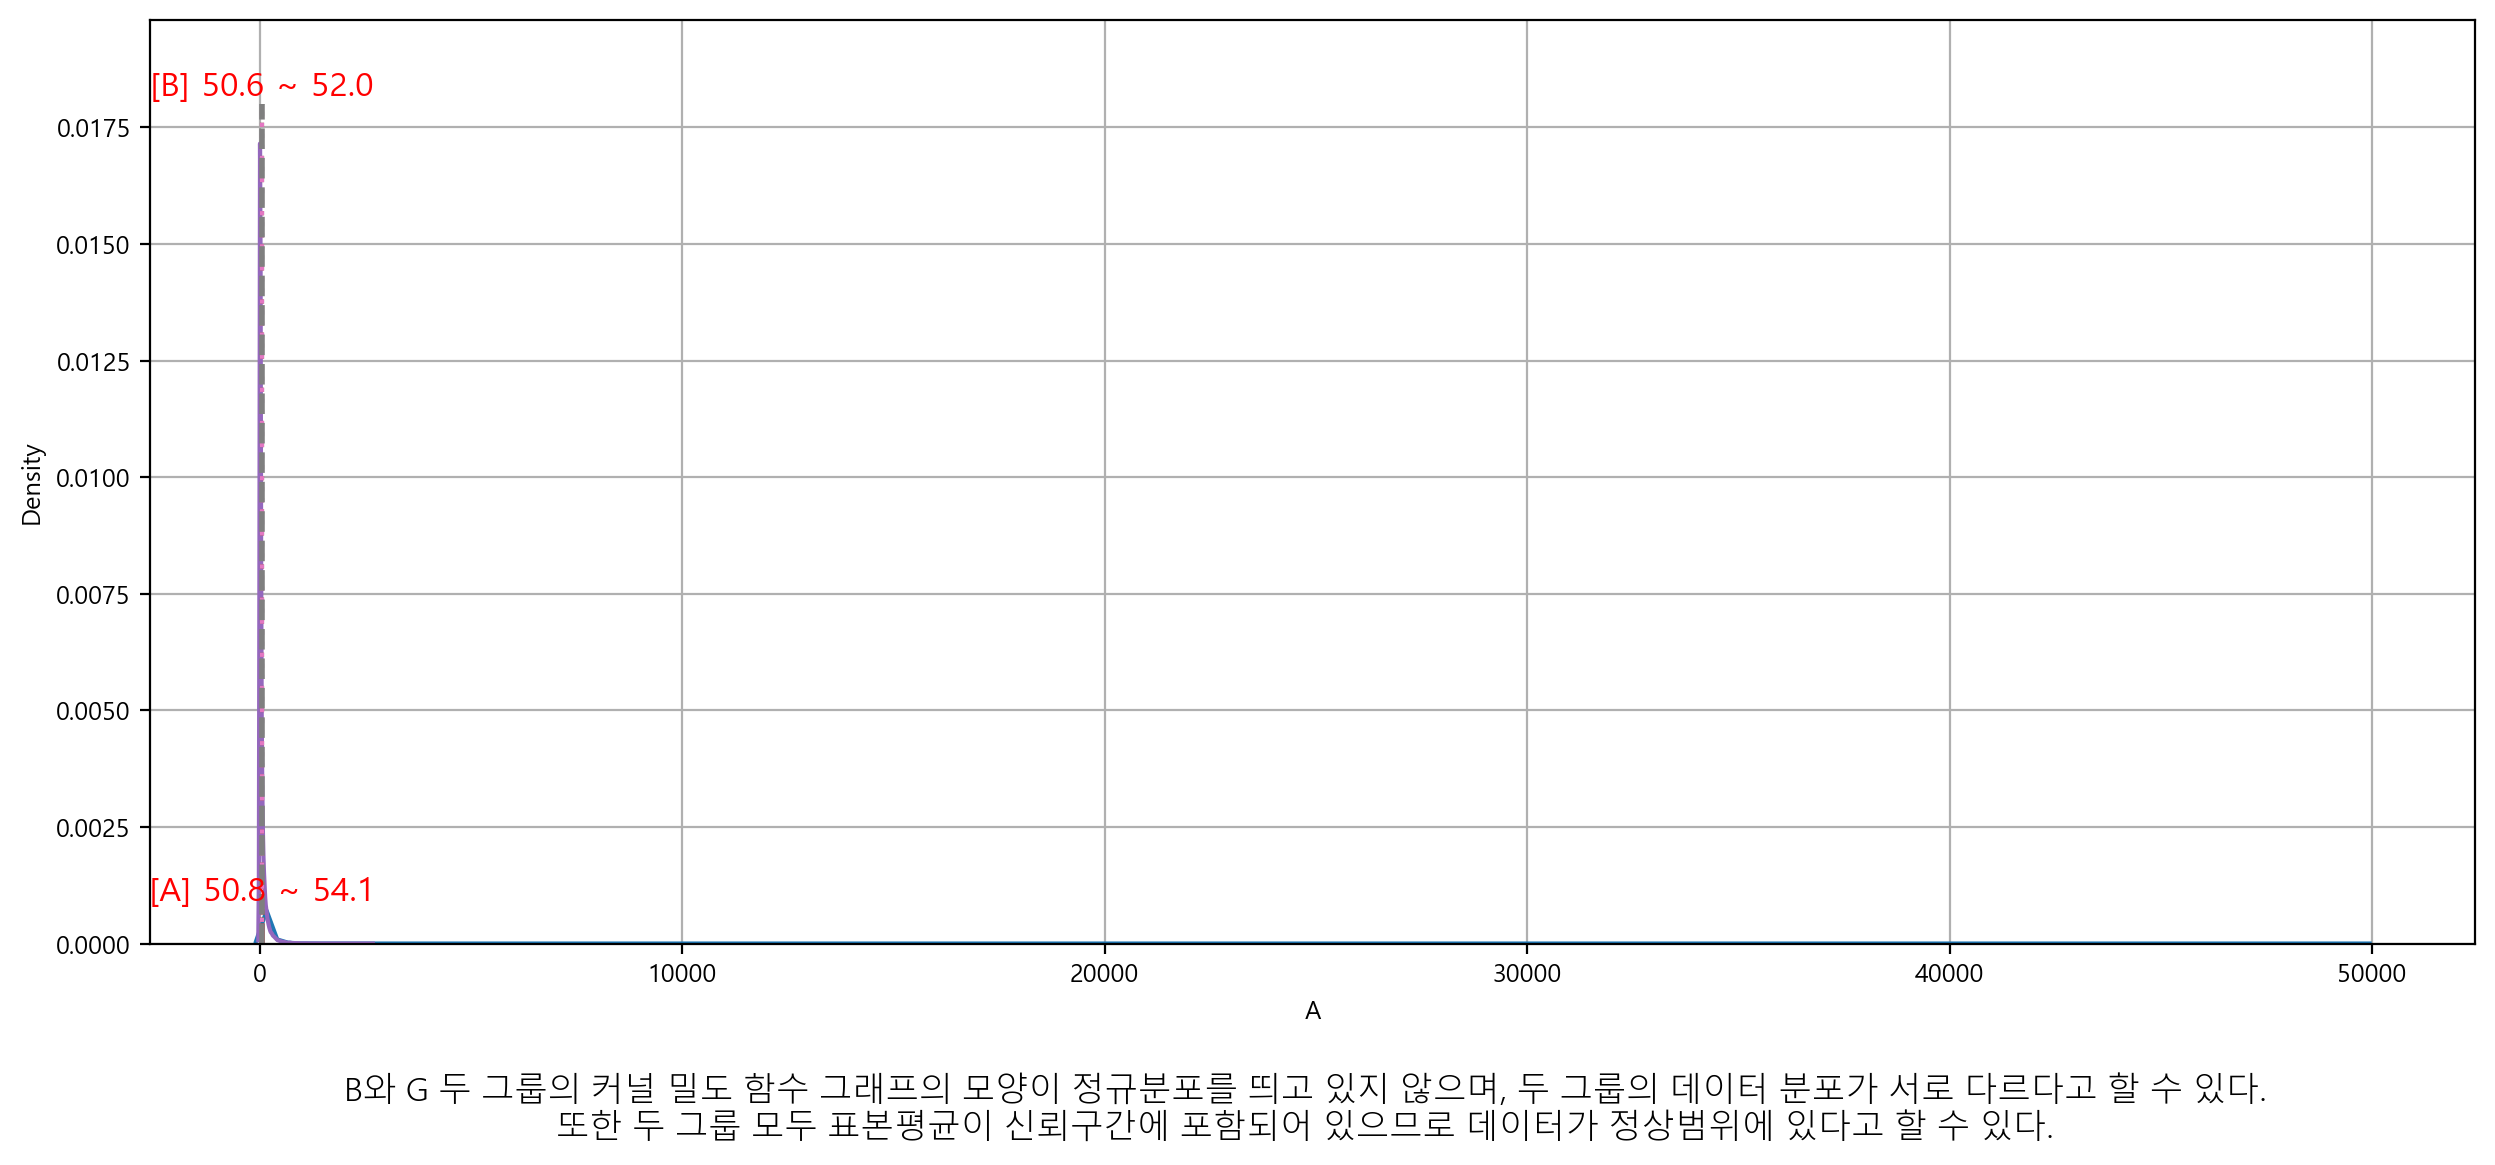

In [55]:
plt.figure()

for c in df7_2.columns:
    #print(c)
    
    data = df7_2[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()
    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})
    
plt.ylim(0, ymax*1.1)

txt = """B와 G 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있지 않으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.grid()
plt.show()
plt.close()

### [3] 가설검정의 가정 확인

#### (1) 정규성

In [56]:
for c in df7_2.columns:
    s, p = normaltest(df7_2[c].dropna())
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[A] statistic: 206386.768, p-value: 0.000, 정규성 충족 여부: False
[B] statistic: 52497.052, p-value: 0.000, 정규성 충족 여부: False


> `p-value`가 `0.000`이므로 정규성을 충족하지 못한다.


#### (2) 등분산성

In [57]:
normal_dist = False      # 정규성 만족 여부
data = df7_2.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x].dropna(), data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)
    
print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p > 0.05))

Levene 검정: statistic: 0.529, p-value: 0.467, 등분산성 충족 여부: True


> `p-value`가 0.05보다 크므로 등분산성을 충족한다.


### [4] 개편전후 비교

#### (1) 유의미한 차이가 있는지 확인

| 구분               | 수식            | 내용                                       |
| ------------------ | --------------- | ------------------------------------------ |
| 개편이전 플레이타임 | $\mu(개편이전)$ | |
| 개편이후 플레이타임 | $\mu(개편이후)$ | |
| 귀무가설($H_0$) | $\mu(개편이전) = \mu(개편이후)$ | 개편이전과 이후 플레이타임에는 차이가 없다 |
| 대립가설($H_1$) | $\mu(개편이전) \neq \mu(개편이후)$ | 개편이전과 이후 플레이타임에는 차이가 있다 |

In [58]:
s, p = ttest_ind(df7_2['A'].dropna(), df7_2['B'].dropna())
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.891, p-value: 0.373, 귀무가설 채택'

> `p-value`가 `0.05`보다 크므로 귀무가설을 채택한다.

> 따라서 개편전후 플레이타임에 차이가 없다.

### [5] 가설검정 시각화

#### (1) 데이터 전처리


In [59]:
df7_2.describe()

version,A,B
count,44700.000000,45489.000000
mean,52.456264,51.298776
std,256.716423,103.294416
min,0.000000,0.000000
25%,5.000000,5.000000
50%,17.000000,16.000000
75%,50.000000,52.000000
max,49854.000000,2640.000000


In [60]:
melt7 = melt(df7_2).dropna()
melt7

,version,value
0,A,3.0
1,A,38.0
6,A,0.0
11,A,0.0
13,A,39.0
...,...,...
180370,B,10.0
180373,B,97.0
180374,B,30.0
180376,B,51.0


#### (2) 시각화 구현

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: t-test independent samples, P_val:3.729e-01 t=8.910e-01


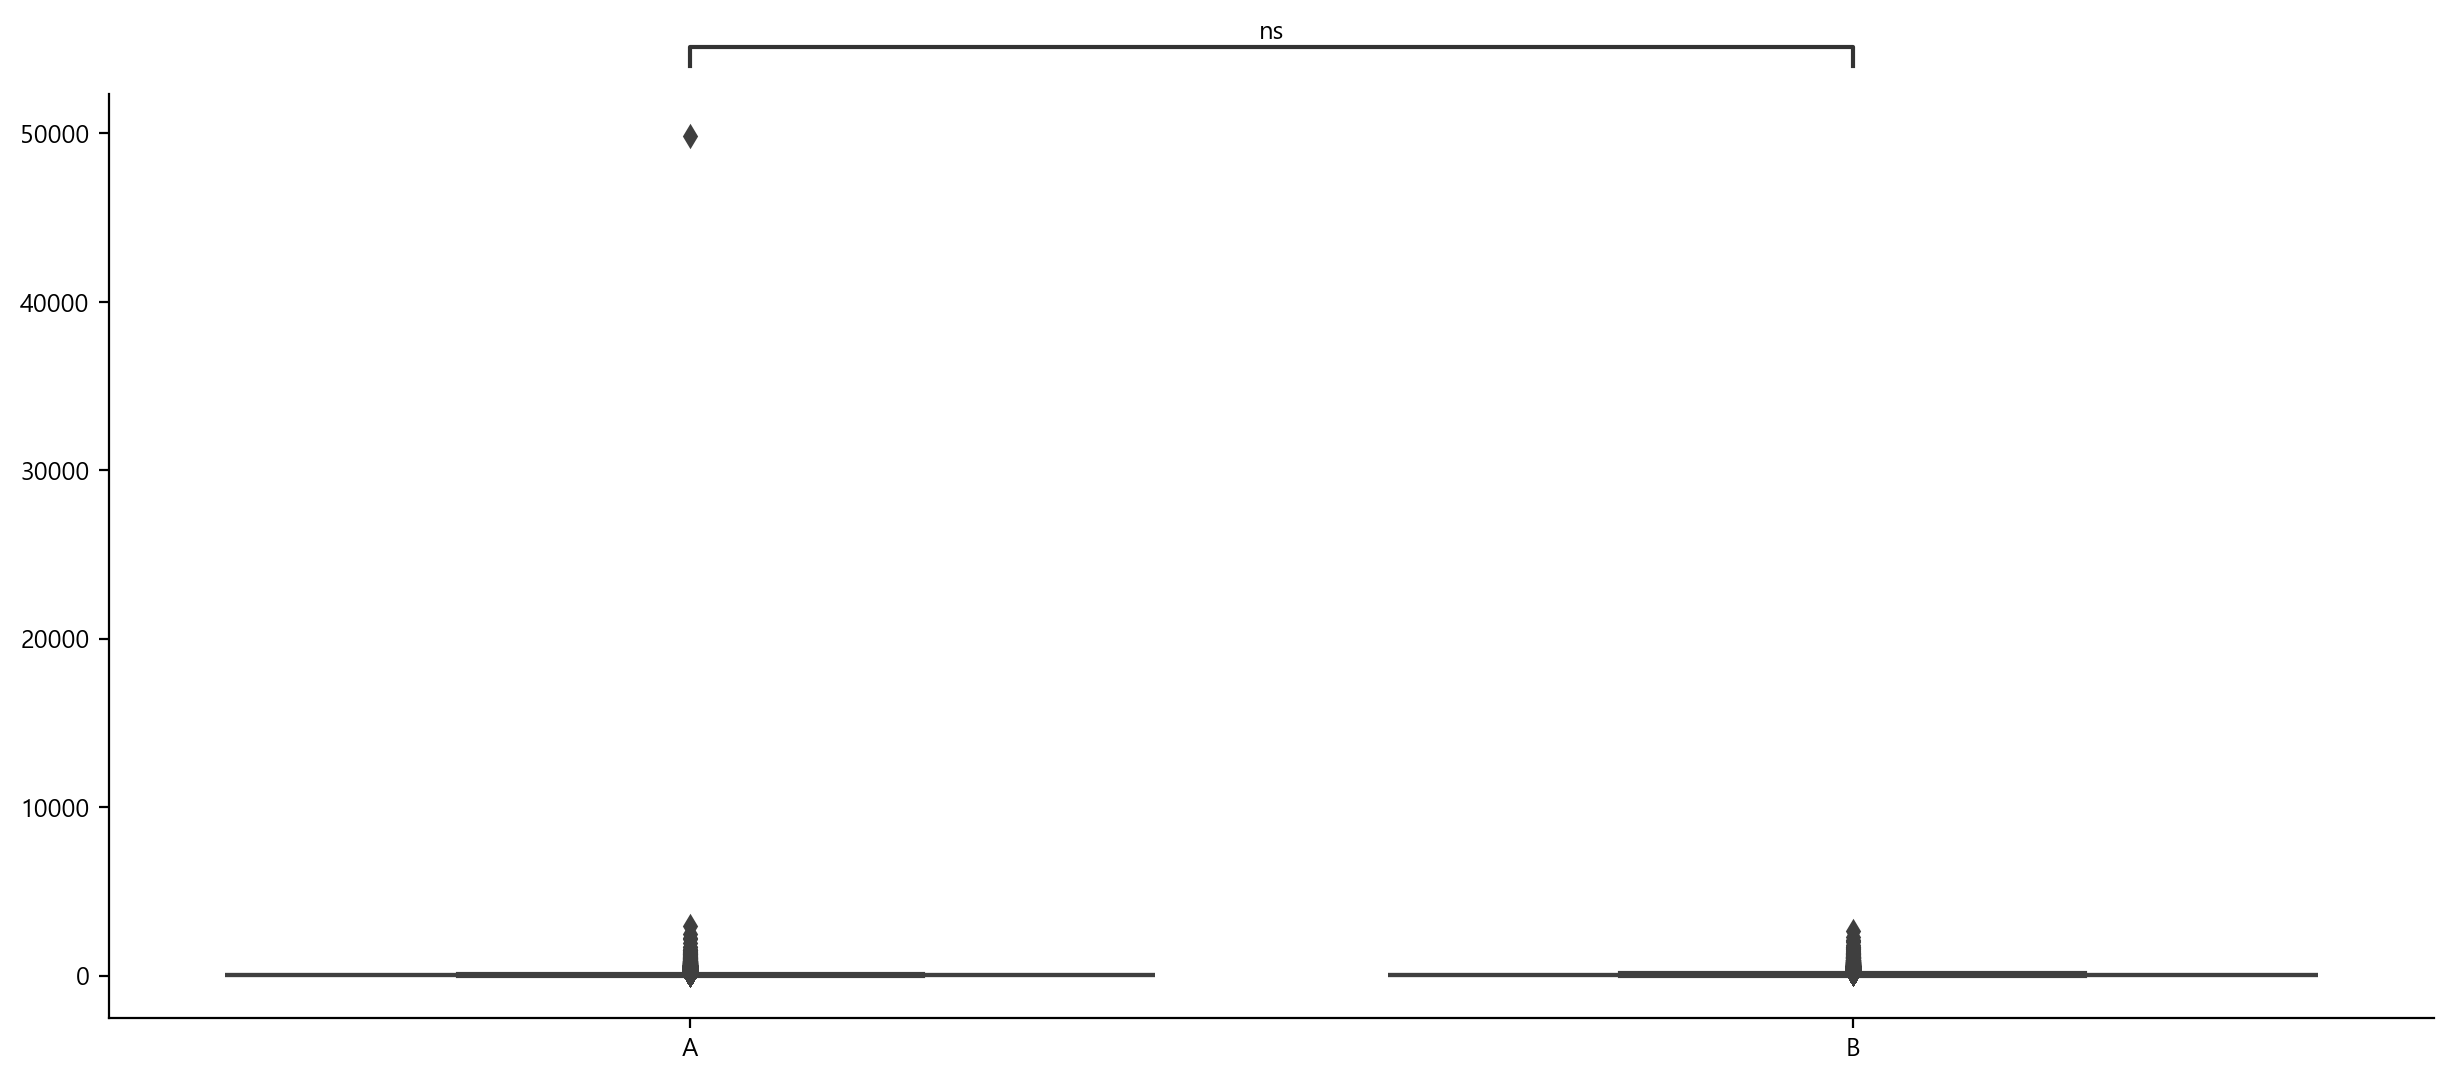

In [61]:
config = {
    "data": melt7,
    "x": "version",
    "y": "value",
    "pairs": [("A", "B")],
    "test": "t-test_ind", # t-test_ind, t-test_paired, t-test_welch, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
    "text_format": "star", # full, simple, star
    "loc": "outside" # outside, inside
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()
plt.xlabel('')
plt.ylabel('')
sb.despine()
plt.show()
plt.close()